__Code for CASA0010 MSc Urban Spatial Science Dissertation__

__Inequalities in Public Transport Accessibility over a Decade: Through the Spatial Distribution of Ethnicity, Age, and Socioeconomic Status__

A Case Study in Greater London Area

- Student Name: Yuxin Nie <yuxinnie012@gmail.com>
- Supervisor: Esra Suel <e.suel@ucl.ac.uk>
- TfL Supervisor: Shivani Bhatnagar <ShivaniBhatnagar@tfl.gov.uk>; Ela Lewicka <elalewicka@tfl.gov.uk>
- Date: August 2023

This dissertation is submitted in part requirement for the degree of MSc in the Centre for Advanced Spatial Analysis, Bartlett Faculty of the Built Environment, UCL.


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)

%matplotlib inline

# Data cleaning and transformation

## Independent variable: Access Index (PTAL from TfL)

Clean two raw datasets: 2010 PTAL grid data and 2023 PTAL grid data to London LSOA level.

- AI: Access Index
- BUS: AI bus value
- LUL: London Underground
- RAIL: rail
- TRAM: tram

In [8]:
ptal_grid_2010_raw = pd.read_csv("data/PTAL_2010_TfL/GL PTALS 2010 Data Grid Points.csv")
ptal_grid_2023_raw = gpd.read_file("data/PTAL_2023_TfL/2023CY_PTAL.shp")

In [9]:
ptal_grid_2010_raw.head()

ID       X       Y                                      Bus  \
0   1  530845  155952                                   0.0000   
1   2  530945  155952                                   0.0000   
2   3  531045  155952                                   0.0000   
3   4  531145  155952                                   0.0000   
4   5  531245  155952                                   0.0000   

                                       LUL  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

                                        NR  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

                                      PTAI PTAL  
0                                   0.0000    0  
1                                   0.0000    0  
2                                   0.0000    0  
3                                   0.0000    0  
4                                   0.0000    0

<AxesSubplot:>

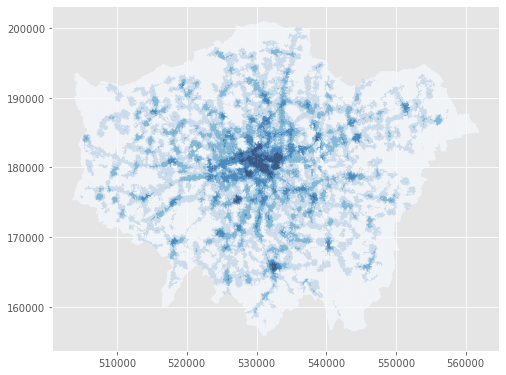

In [6]:
ptal_grid_2010 = gpd.GeoDataFrame(ptal_grid_2010_raw, geometry = gpd.points_from_xy(ptal_grid_2010_raw['X'], ptal_grid_2010_raw['Y'], crs="EPSG:27700"))
ptal_grid_2010.plot(markersize=.1, figsize=(8, 8), column='PTAI', cmap='Blues',scheme="Natural_Breaks")

Output points data and transform the point data into LSOA level in QGIS.

In [7]:
ptal_grid_2010.to_json()
ptal_grid_2010.to_file("data/ptal_grid_points_2010.geojson", driver="GeoJSON") 

In [10]:
ptal_grid_2023_raw.head()

GridID                                      BUS  \
0       1                                   0.0000   
1       2                                   0.0000   
2       3                                   0.0000   
3       4                                   0.0000   
4       5                                   0.0000   

                                       LUL  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

                                      RAIL  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

                                      TRAM  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

                                        AI PTAL  \
0                                   0.0000    0   
1                                   0.0000    0   
2                                   0.0000    0   
3                                   0.0000    0   
4                                   0.0000    0   

                                     PTnum  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

                                            geometry  
0  POLYGON ((530795.880 156002.000, 530895.000 15...  
1  POLYGON ((530895.000 155858.900, 530895.000 15...  
2  POLYGON ((531095.440 155876.180, 530995.000 15...  
3  POLYGON ((531195.000 155886.170, 531112.700 15...  
4  POLYGON ((531295.000 155895.530, 531290.800 15...

In [11]:
ptal_grid_2023_raw.columns

Index(['GridID', 'BUS', 'LUL', 'RAIL', 'TRAM', 'AI', 'PTAL', 'PTnum',
       'geometry'],
      dtype='object')

In [14]:
ptal_grid_2023 = ptal_grid_2023_raw[['AI','BUS', 'LUL', 'RAIL', 'TRAM', 'geometry']]

In [15]:
ptal_grid_2023["latitude"] = ptal_grid_2023.centroid.map(lambda p: p.x)
ptal_grid_2023["longitude"] = ptal_grid_2023.centroid.map(lambda p: p.y)

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
ptal_grid_2023_point = gpd.GeoDataFrame(ptal_grid_2023.drop(["geometry"],axis = 1), geometry=gpd.points_from_xy(ptal_grid_2023.latitude, ptal_grid_2023.longitude))
ptal_grid_2023_point = ptal_grid_2023_point.drop(["latitude","longitude"],axis = 1)
ptal_grid_2023_point = ptal_grid_2023_point.set_crs(27700, allow_override=True)
print(ptal_grid_2023_point.crs)
ptal_grid_2023_point

epsg:27700


AI  \
0                                        0.0000   
1                                        0.0000   
2                                        0.0000   
3                                        0.0000   
4                                        0.0000   
...                                         ...   
159446                                   0.0000   
159447                                   0.0000   
159448                                   0.0000   
159449                                   0.0000   
159450                                   0.0000   

                                            BUS  \
0                                        0.0000   
1                                        0.0000   
2                                        0.0000   
3                                        0.0000   
4                                        0.0000   
...                                         ...   
159446                                   0.0000   
159447                                   0.0000   
159448                                   0.0000   
159449                                   0.0000   
159450                                   0.0000   

                                            LUL  \
0                                        0.0000   
1                                        0.0000   
2                                        0.0000   
3                                        0.0000   
4                                        0.0000   
...                                         ...   
159446                                   0.0000   
159447                                   0.0000   
159448                                   0.0000   
159449                                   0.0000   
159450                                   0.0000   

                                           RAIL  \
0                                        0.0000   
1                                        0.0000   
2                                        0.0000   
3                                        0.0000   
4                                        0.0000   
...                                         ...   
159446                                   0.0000   
159447                                   0.0000   
159448                                   0.0000   
159449                                   0.0000   
159450                                   0.0000   

                                           TRAM                       geometry  
0                                        0.0000  POINT (530861.333 155955.726)  
1                                        0.0000  POINT (530944.306 155929.437)  
2                                        0.0000  POINT (531044.402 155935.807)  
3                                        0.0000  POINT (531144.555 155941.677)  
4                                        0.0000  POINT (531244.294 155946.408)  
...                                         ...                            ...  
159446                                   0.0000  POINT (530945.317 200866.493)  
159447                                   0.0000  POINT (531044.938 200867.627)  
159448                                   0.0000  POINT (531144.042 200864.117)  
159449                                   0.0000  POINT (531242.674 200851.940)  
159450                                   0.0000  POINT (531343.093 200840.280)  

[159451 rows x 6 columns]

In [21]:
ptal_grid_2023_point.to_json()
ptal_grid_2023_point.to_file("data/ptal_grid_points_2023.geojson", driver="GeoJSON")  

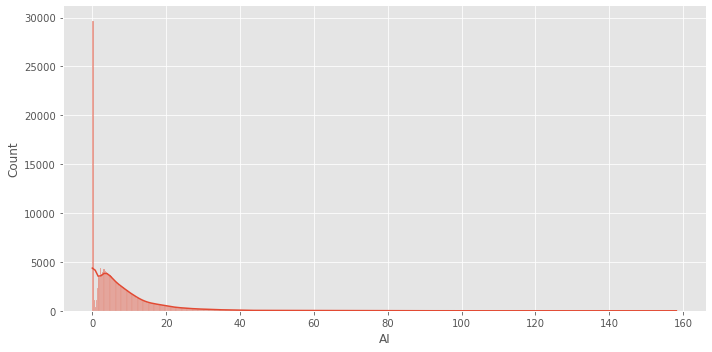

In [22]:
# check the distribution of AI value. To decide whether we use mean or median value.
sns.displot(data=ptal_grid_2023_point, x="AI", kde=True,height=5,aspect=2)

While the overall PTAL values exhibit asymmetry, the quantity of points within a single LSOA is relatively low, typically ranging from 10 to 20. Despite their limited number, each point carries significance, and our objective is to incorporate them into the representative value. Therefore, instead of discarding the outliers, we opt for the mean value over the median to represent the AI value in this particular scenario.

In [129]:
ptal2010_lsoa = gpd.read_file("data/qgis_output/ptal_lsoa_mean_2010.geojson")
ptal2023_lsoa = gpd.read_file("data/qgis_output/ptal2023JoinToLSOAmean.geojson")

____

## Get income deprivation rankings to represent the level of income. (IMD data)

In [54]:
dep2019_raw = pd.read_csv("data/deprivation/All_IoD2019.csv")
dep2010_raw = pd.read_csv("data/deprivation/All_IoD2010.csv")

In [55]:
## we don't use rank here because the ranking is based on the whole England Area. 
## Instead, we only use deprivation score in London and then use percentiles to represent rankings.
dep2019 = dep2019_raw[[
                    'LSOA code (2011)', 
                    'Income Score (rate)',
]]
dep2010 = dep2010_raw[[
                    'LSOA CODE', 
                    'INCOME SCORE', 
          ]]
# clean names of the columns
dep2019 = dep2019.rename(columns={'LSOA code (2011)':"LSOAcd_2011", 
                    'Income Score (rate)':"Income_score_2019",    
})
dep2010 = dep2010.rename(columns={
                        'LSOA CODE':"LSOAcd_2001", 
                    'INCOME SCORE':"Income_score_2010", 
})

**Transform the 2001 lsoa code to 2011 code (REALLY annoying)**

In [56]:
cd01tocd11 = pd.read_csv("data/lsoa_code_transform/Lower_Layer_Super_Output_Area_(2001)_to_Lower_Layer_Super_Output_Area_(2011)_to_Local_Authority_District_(2011)_Lookup_in_England_and_Wales.csv")

In [57]:
cd01tocd11 = cd01tocd11[['LSOA01CD',  'LSOA11CD']]

In [58]:
cd01tocd11.loc[cd01tocd11['LSOA01CD'] == "E01001643"]


LSOA01CD   LSOA11CD
12428  E01001643  E01033746

In [59]:
dep2010_ = dep2010.merge(cd01tocd11, left_on="LSOAcd_2001", right_on = "LSOA01CD",how="inner")
dep2010_.isna().sum()

LSOAcd_2001          0
Income_score_2010    0
LSOA01CD             0
LSOA11CD             0
dtype: int64

In [60]:
dep2010_.loc[dep2010_['LSOA01CD'] == "E01001643"]


LSOAcd_2001                        Income_score_2010   LSOA01CD  \
1652   E01001643                                   0.2300  E01001643   

       LSOA11CD  
1652  E01033746

**Subsetting London for the years 2010 and 2019; obtain new rankings for each year. The deprivation index can only be utilized for comparing rankings, not absolute scores.**

In [61]:
LondonLSOAs = ptal2023_lsoa[['LSOA11CD','geometry']]

In [62]:
deprivation_raw = pd.merge(LondonLSOAs, dep2010_, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
deprivation_raw = pd.merge(deprivation_raw, dep2019, left_on='LSOA11CD', right_on='LSOAcd_2011', how='left')
deprivation = deprivation_raw.copy()

In [63]:
duplicates = list(deprivation_raw[deprivation_raw.duplicated('LSOA11CD')].LSOA11CD)
duplicates

['E01032720',
 'E01032722',
 'E01032787',
 'E01032805',
 'E01033153',
 'E01033456',
 'E01033463',
 'E01033464',
 'E01033583',
 'E01033585',
 'E01033701',
 'E01033724',
 'E01033725',
 'E01033726',
 'E01033726',
 'E01033726',
 'E01033729']

In [64]:
for item in duplicates:
    slices = list(deprivation.loc[deprivation['LSOA11CD'] == item].index)
    deprivation.Income_score_2010.iloc[slices[0]] = (deprivation.Income_score_2010.iloc[slices[0]] +deprivation.Income_score_2010.iloc[slices[1]])/2
    deprivation.drop(slices[1],inplace=True)

/tmp/ipykernel_9237/3564609194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deprivation.Income_score_2010.iloc[slices[0]] = (deprivation.Income_score_2010.iloc[slices[0]] +deprivation.Income_score_2010.iloc[slices[1]])/2
/tmp/ipykernel_9237/3564609194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deprivation.Income_score_2010.iloc[slices[0]] = (deprivation.Income_score_2010.iloc[slices[0]] +deprivation.Income_score_2010.iloc[slices[1]])/2
/tmp/ipykernel_9237/3564609194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [65]:
len(list(deprivation.LSOA11CD.unique()))

4835

In [66]:
deprivation[deprivation['Income_score_2010'].isna()]

LSOA11CD                                           geometry  \
4835  E01033730  MULTIPOLYGON (((537830.389 177685.093, 537790....   

     LSOAcd_2001  Income_score_2010 LSOA01CD LSOAcd_2011  \
4835         NaN                NaN      NaN   E01033730   

                            Income_score_2019  
4835                                   0.1100

In [67]:
deprivation = deprivation[['LSOA11CD', 'LSOAcd_2001','Income_score_2010','Income_score_2019','geometry']]

In [68]:
deprivation.loc[deprivation['LSOA11CD'] == "E01033730"]

LSOA11CD LSOAcd_2001  Income_score_2010  \
4835  E01033730         NaN                NaN   

                            Income_score_2019  \
4835                                   0.1100   

                                               geometry  
4835  MULTIPOLYGON (((537830.389 177685.093, 537790....

In [69]:
deprivation.loc[deprivation['LSOA11CD'] == "E01033746"]

LSOA11CD LSOAcd_2001                        Income_score_2010  \
4851  E01033746   E01001643                                   0.2300   

                            Income_score_2019  \
4851                                   0.1450   

                                               geometry  
4851  POLYGON ((538140.000 177313.000, 538129.177 17...

In [70]:
deprivation.LSOAcd_2001.loc[deprivation['LSOA11CD'] == "E01033730"] = "E01001643"
deprivation.Income_score_2010.loc[deprivation['LSOA11CD'] == "E01033730"] =0.2300
deprivation = deprivation[['LSOA11CD', 'Income_score_2010','Income_score_2019','geometry']]

In [71]:
deprivation["income2010_rank"] = deprivation.iloc[:,1].rank(ascending=False)
deprivation["income2019_rank"] = deprivation.iloc[:,2].rank(ascending=False)
deprivation.describe()

Income_score_2010  \
count                               4,835.0000   
mean                                    0.1887   
std                                     0.1133   
min                                     0.0100   
25%                                     0.0900   
50%                                     0.1700   
75%                                     0.2700   
max                                     0.5800   

                             Income_score_2019  \
count                               4,835.0000   
mean                                    0.1362   
std                                     0.0757   
min                                     0.0060   
25%                                     0.0750   
50%                                     0.1250   
75%                                     0.1890   
max                                     0.4370   

                               income2010_rank  \
count                               4,835.0000   
mean                                2,418.0000   
std                                 1,395.3447   
min                                     1.0000   
25%                                 1,191.0000   
50%                                 2,451.0000   
75%                                 3,692.0000   
max                                 4,823.5000   

                               income2019_rank  
count                               4,835.0000  
mean                                2,418.0000  
std                                 1,395.8757  
min                                     1.0000  
25%                                 1,201.5000  
50%                                 2,430.0000  
75%                                 3,621.5000  
max                                 4,834.5000

In [73]:
deprivation_ranking = deprivation[['LSOA11CD', 'income2010_rank','income2019_rank','geometry']]

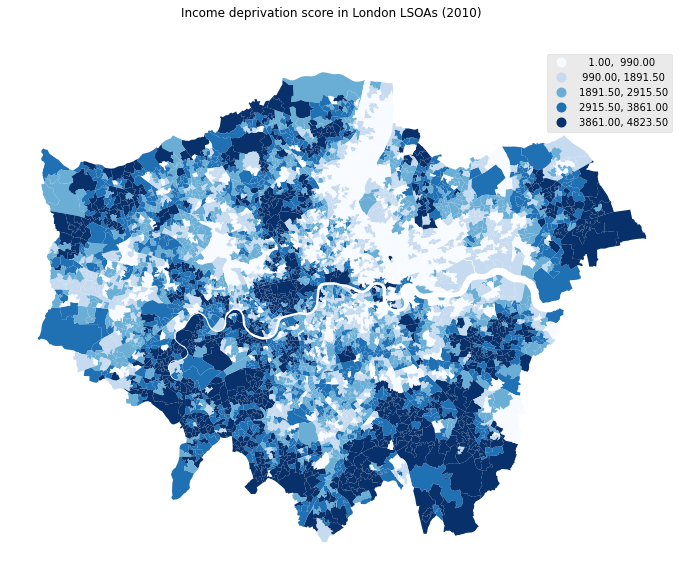

In [78]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax = f.add_subplot()
deprivation_ranking.plot(column="income2010_rank", legend=True, ax = ax,cmap="Blues", 
                        scheme="quantiles",
                        aspect=1)
ax.set_axis_off()

f.subplots_adjust(top=1)
f.suptitle("Income deprivation score in London LSOAs (2010)")

plt.axis('off')
plt.show()

## Clean Age variable from census

In [79]:
age11_raw = pd.read_excel("data/census_2021_migration/Five year age bands.xlsx",sheet_name = "2011")
age21_raw = pd.read_excel("data/census_2021_migration/Five year age bands.xlsx",sheet_name = "2021")

In [80]:
cd11to22 = pd.read_csv("data/lsoa_code_transform/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv")

In [81]:
cd11to22 = cd11to22[['LSOA11CD',  'LSOA21CD']]

In [82]:
age21_ = age21_raw.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")
age21 = pd.merge(LondonLSOAs, age21_, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

age11_ = age11_raw.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")
age11 = pd.merge(LondonLSOAs, age11_, left_on='LSOA11CD', right_on='LSOA11CD', how='left')


In [83]:
age11.shape

(4835, 26)

### Calculate median age

In [84]:
age11_median = age11.copy()
age21_median = age21.copy()

In [85]:
age11_median.columns

Index(['LSOA11CD', 'geometry', 'LSOA code', 'local authority code',
       'local authority name', 'All usual residents', 'Aged 4 and under',
       'Aged 5 to 9', 'Aged 10 to 14', 'Aged 15 to 19', 'Aged 20 to 24',
       'Aged 25 to 29', 'Aged 30 to 34', 'Aged 35 to 39', 'Aged 40 to 44',
       'Aged 45 to 49', 'Aged 50 to 54', 'Aged 55 to 59', 'Aged 60 to 64',
       'Aged 65 to 69', 'Aged 70 to 74', 'Aged 75 to 79', 'Aged 80 to 84',
       'Aged 85 and over', 'average age', 'LSOA21CD'],
      dtype='object')

In [86]:
age11_median = age11_median.rename(columns={ 
                    'Aged 4 and under':"Aged 4 and 0",
                        'Aged 85 and over':"Aged 85 and 92",  
})

age21_median = age21_median.rename(columns={ 
                    'Aged 4 and under':"Aged 4 and 0",
                        'Aged 85 and over':"Aged 85 and 92",  
})

#### year 2011

In [87]:
import statistics
# Calculate median age for each LSOA
median_ages = []
for index, row in age11_median.iterrows():
    individual_ages = []
    for column, count in row.items():
        if column not in ['LSOA11CD', 'geometry', 'LSOA code', 'local authority code', 'local authority name', 'All usual residents', 'average age', 'LSOA21CD']:
            if 'and over' in column:
                age_midpoint = 90
            else:
                age_band = column.split()[-3:]  # Extract the age band, e.g., ['Aged', '20', 'to', '24']
                age_midpoint = (int(age_band[0]) + int(age_band[2])) // 2
            individual_ages.extend([age_midpoint] * count)
    median_age = statistics.median(individual_ages) if individual_ages else 0  # Handle cases with no data
    median_ages.append(int(median_age))


age11_median['median_age'] = median_ages


In [88]:
age11_median = age11_median[['LSOA11CD',  'average age',  'median_age']]

In [89]:
age11_median.head()

LSOA11CD                              average age  median_age
0  E01000001                                  45.5222          47
1  E01000002                                  45.3426          47
2  E01000003                                  43.1813          42
3  E01000005                                  37.2690          32
4  E01000006                                  32.4756          32

In [90]:
# Sort the DataFrame based on "median age" and then "average age"
sorted_df11 = age11_median.sort_values(by=['median_age', 'average age'])
sorted_df11['rank'] = range(1, len(sorted_df11) + 1)

sorted_df11.describe()

average age  \
count                               4,835.0000   
mean                                   35.7432   
std                                     3.7849   
min                                    24.8040   
25%                                    33.1503   
50%                                    35.3679   
75%                                    38.0832   
max                                    54.5560   

                                    median_age  \
count                               4,835.0000   
mean                                   34.3305   
std                                     5.0113   
min                                    17.0000   
25%                                    32.0000   
50%                                    32.0000   
75%                                    37.0000   
max                                    57.0000   

                                          rank  
count                               4,835.0000  
mean                                2,418.0000  
std                                 1,395.8886  
min                                     1.0000  
25%                                 1,209.5000  
50%                                 2,418.0000  
75%                                 3,626.5000  
max                                 4,835.0000

In [91]:
percentiles = [0, 0.2, 0.4, 0.6, 0.8,1.0]  
percentile_values = sorted_df11['rank'].quantile(percentiles)
percentile_values[0.2]

967.8000000000001

In [92]:
age_con = [
    (sorted_df11['rank'] <= percentile_values[0.2]),
    (sorted_df11['rank'] > percentile_values[0.2]) & (sorted_df11['rank'] <= percentile_values[0.4]),
    (sorted_df11['rank'] > percentile_values[0.4]) & (sorted_df11['rank'] <= percentile_values[0.6]),
    (sorted_df11['rank'] > percentile_values[0.6]) & (sorted_df11['rank'] <= percentile_values[0.8]),
    (sorted_df11['rank'] > percentile_values[0.8])
    ]
age_values = ['ageQ1_11', 'ageQ2_11', 'ageQ3_11', 'ageQ4_11','ageQ5_11']
sorted_df11['age_quartiles11'] = np.select(age_con, age_values)
sorted_df11.head()

LSOA11CD                              average age  median_age  rank  \
2087  E01002137                                  28.6130          17     1   
1689  E01001728                                  24.8040          22     2   
1038  E01001057                                  25.0884          22     3   
1764  E01001808                                  25.8629          22     4   
1778  E01001825                                  25.9518          22     5   

     age_quartiles11  
2087        ageQ1_11  
1689        ageQ1_11  
1038        ageQ1_11  
1764        ageQ1_11  
1778        ageQ1_11

In [93]:
sorted_df11.age_quartiles11.unique()

array(['ageQ1_11', 'ageQ2_11', 'ageQ3_11', 'ageQ4_11', 'ageQ5_11'],
      dtype=object)

#### year 2021

In [94]:
import statistics
# Calculate median age for each LSOA
median_ages = []
for index, row in age21_median.iterrows():
    individual_ages = []
    for column, count in row.items():
        if column not in ['LSOA11CD', 'geometry', 'LSOA code', 'local authority code', 'local authority name', 'All usual residents', 'average age', 'LSOA21CD']:
            if 'and over' in column:
                age_midpoint = 90
            else:
                age_band = column.split()[-3:]  # Extract the age band, e.g., ['Aged', '20', 'to', '24']
                age_midpoint = (int(age_band[0]) + int(age_band[2])) // 2
            individual_ages.extend([age_midpoint] * count)
    median_age = statistics.median(individual_ages) if individual_ages else 0  # Handle cases with no data
    median_ages.append(int(median_age))


age21_median['median_age'] = median_ages


In [95]:
age21_median.columns

Index(['LSOA11CD', 'geometry', 'LSOA code', 'local authority code',
       'local authority name', 'All usual residents', 'Aged 4 and 0',
       'Aged 5 to 9', 'Aged 10 to 14', 'Aged 15 to 19', 'Aged 20 to 24',
       'Aged 25 to 29', 'Aged 30 to 34', 'Aged 35 to 39', 'Aged 40 to 44',
       'Aged 45 to 49', 'Aged 50 to 54', 'Aged 55 to 59', 'Aged 60 to 64',
       'Aged 65 to 69', 'Aged 70 to 74', 'Aged 75 to 79', 'Aged 80 to 84',
       'Aged 85 and 92', 'average age', 'LSOA21CD', 'median_age'],
      dtype='object')

In [96]:
age21_median = age21_median[['LSOA11CD', 'geometry', 'average age',  'median_age']]

In [97]:
age21_median.head()

LSOA11CD                                           geometry  \
0  E01000001  POLYGON ((532105.092 182011.230, 532162.491 18...   
1  E01000002  POLYGON ((532746.813 181786.891, 532671.688 18...   
2  E01000003  POLYGON ((532135.145 182198.119, 532158.250 18...   
3  E01000005  POLYGON ((533807.946 180767.770, 533649.063 18...   
4  E01000006  POLYGON ((545122.049 184314.931, 545271.917 18...   

                               average age  median_age  
0                                  45.4906          42  
1                                  44.8871          42  
2                                  44.3995          42  
3                                  37.3097          32  
4                                  34.1436          32

In [98]:
# Sort the DataFrame based on "median age" and then "average age"
sorted_df21 = age21_median.sort_values(by=['median_age', 'average age'])
sorted_df21['rank'] = range(1, len(sorted_df21) + 1)

sorted_df21.describe()

average age  \
count                               4,835.0000   
mean                                   37.3244   
std                                     3.4765   
min                                    25.7014   
25%                                    34.9761   
50%                                    37.0066   
75%                                    39.4093   
max                                    55.4961   

                                    median_age  \
count                               4,835.0000   
mean                                   36.4480   
std                                     4.8444   
min                                    17.0000   
25%                                    32.0000   
50%                                    37.0000   
75%                                    37.0000   
max                                    62.0000   

                                          rank  
count                               4,835.0000  
mean                                2,418.0000  
std                                 1,395.8886  
min                                     1.0000  
25%                                 1,209.5000  
50%                                 2,418.0000  
75%                                 3,626.5000  
max                                 4,835.0000

In [99]:
percentiles = [0, 0.2, 0.4, 0.6, 0.8,1.0]  
percentile_values = sorted_df21['rank'].quantile(percentiles)
percentile_values[0.2]
age_con = [
    (sorted_df21['rank'] <= percentile_values[0.2]),
    (sorted_df21['rank'] > percentile_values[0.2]) & (sorted_df21['rank'] <= percentile_values[0.4]),
    (sorted_df21['rank'] > percentile_values[0.4]) & (sorted_df21['rank'] <= percentile_values[0.6]),
    (sorted_df21['rank'] > percentile_values[0.6]) & (sorted_df21['rank'] <= percentile_values[0.8]),
    (sorted_df21['rank'] > percentile_values[0.8])
    ]
age_values = ['ageQ1_21', 'ageQ2_21', 'ageQ3_21', 'ageQ4_21','ageQ5_21']
sorted_df21['age_quartiles21'] = np.select(age_con, age_values)
sorted_df21.head()

LSOA11CD                                           geometry  \
2087  E01002137  POLYGON ((515847.044 187490.377, 515697.919 18...   
1689  E01001728  POLYGON ((534551.506 186971.945, 534578.548 18...   
2005  E01002055  POLYGON ((533858.500 188341.000, 533894.000 18...   
1755  E01001799  POLYGON ((533608.172 187486.004, 533605.848 18...   
1760  E01001804  POLYGON ((533015.440 187292.058, 533017.096 18...   

                                  average age  median_age  rank  \
2087                                  29.5958          17     1   
1689                                  25.7014          22     2   
2005                                  25.7673          22     3   
1755                                  27.2830          22     4   
1760                                  27.3825          22     5   

     age_quartiles21  
2087        ageQ1_21  
1689        ageQ1_21  
2005        ageQ1_21  
1755        ageQ1_21  
1760        ageQ1_21

In [100]:
sorted_df21.columns
['LSOA11CD', 'geometry', 'average age', 'median_age', 'rank',
       'age_quartiles21']

['LSOA11CD',
 'geometry',
 'average age',
 'median_age',
 'rank',
 'age_quartiles21']

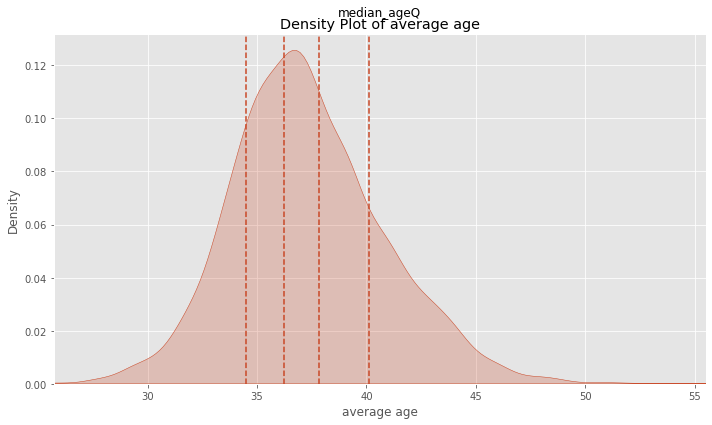

In [102]:
variable = 'average age'
new_column_name = 'median_ageQ' 

plt.figure(figsize=(10, 6))

# Plot the density curve
sns.kdeplot(data=sorted_df21, x=variable, color='#c94726', shade=True)

# Define the desired percentiles to evenly space the lines
desired_percentiles = [0, 20, 40, 60, 80, 100]
percentile_values = np.percentile(sorted_df21[variable], desired_percentiles)

# Plot vertical lines for quintile breakpoints
for value in percentile_values[1:5]:  # Skip the first line
    plt.axvline(x=value, color='#c94726', linestyle='--')

# Set the x-axis limits based on your data range
plt.xlim(sorted_df21[variable].min(), sorted_df21[variable].max())

plt.title(f'Density Plot of {variable}')
plt.xlabel(variable)
plt.ylabel('Density')
plt.annotate(new_column_name, xy=(0.5, 1.05), xycoords='axes fraction', ha='center', fontsize=12)
plt.tight_layout()
plt.show()


In [103]:
age = pd.merge(sorted_df21, sorted_df11, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [104]:
age = age[['LSOA11CD','geometry', 'age_quartiles11',  'age_quartiles21']]

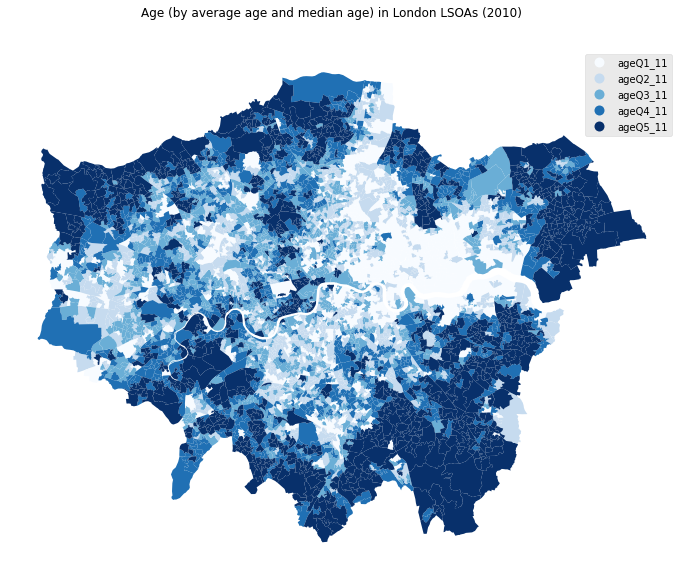

In [106]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)
ax1 = f.add_subplot()
age.plot(column="age_quartiles11", legend=True, ax = ax1,cmap="Blues", 
                        aspect=1)
ax1.set_axis_off()
f.subplots_adjust(top=1)
f.suptitle("Age (by average and median age) in London LSOAs (2010)")
plt.axis('off')
plt.show()

## Car ownerships from census


In [107]:
car11 = pd.read_excel("data/census_2021_housing/cars or vans (1).xlsx",sheet_name = "2011")
car21 = pd.read_excel("data/census_2021_housing/cars or vans (1).xlsx",sheet_name = "2021")

In [108]:
car11 = car11.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")
car21 = car21.merge(cd11to22, left_on="LSOA code", right_on = "LSOA21CD",how="left")

In [109]:
car11["car_percentage11"] = 1 - (car11["none"]/car11["All households "])
car21["car_percentage21"] = 1 - (car21["none"]/car21["All households "])
car11 = car11[['LSOA11CD','LSOA21CD', 'car_percentage11']]
car21 = car21[['LSOA11CD','LSOA21CD', 'car_percentage21']]

In [111]:
car = pd.merge(LondonLSOAs, car21, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
car = pd.merge(car, car11, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
car = car[['LSOA11CD', 'geometry', 'car_percentage21', 'car_percentage11']]
car['car_percentage11'] = car['car_percentage11']*100
car['car_percentage21'] = car['car_percentage21']*100
car.describe()

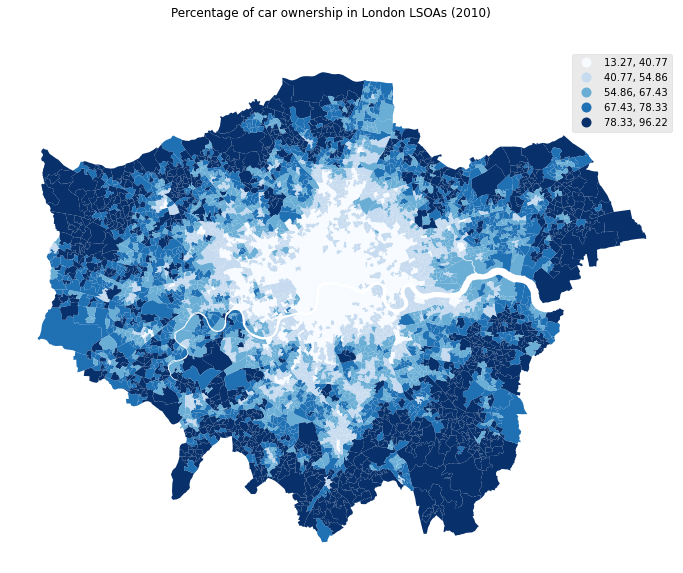

In [117]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
car.plot(column="car_percentage21", legend=True, ax = ax1,cmap="Blues", 
                        scheme="quantiles",
                        aspect=1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
f.suptitle("Percentage of car ownership in London LSOAs (2010)")

plt.axis('off')
plt.show()

## 2023 (PTAL, Ethnic)

In [119]:
ptal2023_lsoa = ptal2023_lsoa[['LSOA11CD', 'AI_mean','LUL_mean','BUS_mean', 'RAIL_mean', 'TRAM_mean','OA','geometry']]

In [120]:
ethnic2021_raw = gpd.read_file("data/ethnic_clean/ethnic_2021.geojson")

In [121]:
ethnic2021 = ethnic2021_raw[['LSOA11CD',
                             'PopdensePerKm21', 
                             'white_rate', 'mixed_rate', 'asian_rate', 'black_rate', 'other_rate']]

In [123]:
ethnic2021['white_rate'] = ethnic2021['white_rate']*100
ethnic2021['mixed_rate'] = ethnic2021['mixed_rate']*100
ethnic2021['asian_rate'] = ethnic2021['asian_rate']*100
ethnic2021['black_rate'] = ethnic2021['black_rate']*100
ethnic2021['other_rate'] = ethnic2021['other_rate']*100
ethnic2021.describe()

/tmp/ipykernel_9237/2741254609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2021['white_rate'] = ethnic2021['white_rate']*100
/tmp/ipykernel_9237/2741254609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2021['mixed_rate'] = ethnic2021['mixed_rate']*100
/tmp/ipykernel_9237/2741254609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

PopdensePerKm21  \
count                               4,835.0000   
mean                               10,002.3436   
std                                 6,423.8523   
min                                   119.3700   
25%                                 5,413.4750   
50%                                 8,773.5200   
75%                                13,377.4550   
max                                70,389.8100   

                                    white_rate  \
count                               4,835.0000   
mean                                5,514.9818   
std                                 1,875.3655   
min                                   194.4895   
25%                                 4,146.7055   
50%                                 5,670.4261   
75%                                 7,012.5161   
max                                 9,662.3223   

                                    mixed_rate  \
count                               4,835.0000   
mean                                  573.9378   
std                                   202.7660   
min                                    68.3891   
25%                                   427.1566   
50%                                   571.5871   
75%                                   708.3445   
max                                 1,851.3324   

                                    asian_rate  \
count                               4,835.0000   
mean                                1,966.3332   
std                                 1,605.5147   
min                                    65.1659   
25%                                   866.3272   
50%                                 1,388.2353   
75%                                 2,417.7320   
max                                 8,788.4268   

                                    black_rate  \
count                               4,835.0000   
mean                                1,319.7158   
std                                 1,070.3970   
min                                     0.0000   
25%                                   509.8149   
50%                                   986.7910   
75%                                 1,848.9229   
max                                 6,060.3332   

                                    other_rate  
count                               4,835.0000  
mean                                  625.0314  
std                                   399.4242  
min                                     0.0000  
25%                                   344.4411  
50%                                   523.4657  
75%                                   812.5818  
max                                 3,513.5135

### Join ethnic 2021 to ptal 2023.

In [128]:
eth21_ptal23 = pd.merge(ptal2023_lsoa, ethnic2021, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
eth21_ptal23.describe()

AI_mean  \
count                               4,835.0000   
mean                                   13.2364   
std                                    11.6486   
min                                     0.1842   
25%                                     5.7658   
50%                                     9.7404   
75%                                    16.7822   
max                                   101.5079   

                                      LUL_mean  \
count                               4,835.0000   
mean                                    2.9774   
std                                     5.6152   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     4.1419   
max                                    44.8608   

                                      BUS_mean  \
count                               4,835.0000   
mean                                    8.2445   
std                                     5.1791   
min                                     0.0412   
25%                                     4.5239   
50%                                     7.0717   
75%                                    10.6061   
max                                    44.6360   

                                     RAIL_mean  \
count                               4,835.0000   
mean                                    1.9393   
std                                     3.7180   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.4967   
75%                                     2.5399   
max                                    40.7429   

                                     TRAM_mean  \
count                               4,835.0000   
mean                                    0.0751   
std                                     0.5124   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0000   
max                                     7.2660   

                                            OA  \
count                               4,835.0000   
mean                                    0.1826   
std                                     0.3864   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0000   
max                                     1.0000   

                               PopdensePerKm21  \
count                               4,835.0000   
mean                               10,002.3436   
std                                 6,423.8523   
min                                   119.3700   
25%                                 5,413.4750   
50%                                 8,773.5200   
75%                                13,377.4550   
max                                70,389.8100   

                                    white_rate  \
count                               4,835.0000   
mean                                5,514.9818   
std                                 1,875.3655   
min                                   194.4895   
25%                                 4,146.7055   
50%                                 5,670.4261   
75%                                 7,012.5161   
max                                 9,662.3223   

                                    mixed_rate  \
count                               4,835.0000   
mean                                  573.9378   
std                                   202.7660   
min                                    68.3891   
25%                                   427.1566   
50%                                   571.5871   
75%                                   708.3445   
max                            

## 2010 (PTAL, Ethnic)

In [130]:
ethnic2011_raw = gpd.read_file("data/ethnic_clean/ethnic_2011.geojson")

In [131]:
ptal2010_lsoa = ptal2010_lsoa[['LSOA11CD','PTAI_mean', 'Bus_mean', 'LUL_mean', 'NR_mean','geometry']]

In [133]:
ethnic2011 =ethnic2011_raw[['LSOA11CD','PopdensePerKm11','white_rate','mixed_rate', 'asian_rate', 'black_rate', 'other_rate']]

ethnic2011['white_rate'] = ethnic2011['white_rate']*100
ethnic2011['mixed_rate'] = ethnic2011['mixed_rate']*100
ethnic2011['asian_rate'] = ethnic2011['asian_rate']*100
ethnic2011['black_rate'] = ethnic2011['black_rate']*100
ethnic2011['other_rate'] = ethnic2011['other_rate']*100

eth11_ptal10 = pd.merge(ptal2010_lsoa, ethnic2011, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
eth11_ptal10.describe()

/tmp/ipykernel_9237/2161401759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2011['white_rate'] = ethnic2011['white_rate']*100
/tmp/ipykernel_9237/2161401759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnic2011['mixed_rate'] = ethnic2011['mixed_rate']*100
/tmp/ipykernel_9237/2161401759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

PTAI_mean  \
count                               4,835.0000   
mean                                   11.3852   
std                                     9.8192   
min                                     0.0953   
25%                                     4.9292   
50%                                     8.4329   
75%                                    14.6120   
max                                    88.7433   

                                      Bus_mean  \
count                               4,835.0000   
mean                                    7.6179   
std                                     5.3559   
min                                     0.0205   
25%                                     3.9658   
50%                                     6.1980   
75%                                     9.7231   
max                                    44.7662   

                                      LUL_mean  \
count                               4,835.0000   
mean                                    2.2252   
std                                     4.1752   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     3.0387   
max                                    32.5346   

                                       NR_mean  \
count                               4,835.0000   
mean                                    1.5428   
std                                     2.8307   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.2886   
75%                                     2.2892   
max                                    36.2635   

                               PopdensePerKm11  \
count                               4,835.0000   
mean                                9,647.6264   
std                                 6,652.1812   
min                                   115.8900   
25%                                 5,083.3900   
50%                                 8,243.0400   
75%                                12,788.2250   
max                                93,957.5100   

                                    white_rate  \
count                               4,835.0000   
mean                                   60.6944   
std                                    20.3689   
min                                     3.5438   
25%                                    46.0122   
50%                                    63.0662   
75%                                    77.6962   
max                                    98.1591   

                                    mixed_rate  \
count                               4,835.0000   
mean                                    4.9246   
std                                     1.9479   
min                                     0.6061   
25%                                     3.5018   
50%                                     4.8131   
75%                                     6.1981   
max                                    14.3907   

                                    asian_rate  \
count                               4,835.0000   
mean                                   17.9359   
std                                    16.1667   
min                                     0.7519   
25%                                     7.3028   
50%                                    12.0101   
75%                                    21.9579   
max                                    86.8955   

                                    black_rate  \
count                               4,835.0000   
mean                                   13.0663   
std                                    11.2133   
min                                     0.1334   
25%                                     4.3350   
50%                                     9.4561   
75%                                    18.9665   
max                          

## Change of access index

In [151]:
ptal2023_lsoa = ptal2023_lsoa.rename(columns={ 
                    'AI_mean':"total_access_index23",
                    'LUL_mean':"underground23",
                    'BUS_mean':"bus23", 
                    'RAIL_mean':"rail23", 
                    'TRAM_mean':"tram23",
})
ptal2010_lsoa = ptal2010_lsoa.rename(columns={
                    'PTAI_mean':"total_access_index10",
                    'Bus_mean':"bus10", 
                    'LUL_mean':"underground10",
                    'NR_mean':"rail10", 
})

In [152]:
ptalLSOA_change = pd.merge(ptal2010_lsoa, ptal2023_lsoa.drop("geometry",axis=1), left_on="LSOA11CD", right_on = "LSOA11CD",how="inner")

In [153]:
ptalLSOA_change["AI_total_change"] = (ptalLSOA_change["total_access_index23"] - ptalLSOA_change["total_access_index10"])
ptalLSOA_change["AI_bus_change"] = (ptalLSOA_change["bus23"] - ptalLSOA_change["bus10"])
ptalLSOA_change["AI_rail_change"] = (ptalLSOA_change["rail23"] - ptalLSOA_change["rail10"])
ptalLSOA_change["AI_underground_change"] = (ptalLSOA_change["underground23"] - ptalLSOA_change["underground10"])

ptalLSOA_change["AI_tram_change"] = ptalLSOA_change["tram23"]


# regression models

## prepare for 2021 regression model.

In [154]:
eth11_ptal10 = eth11_ptal10.rename(columns={ 
                    'white_rate':"white_rate11",
                    'mixed_rate':"mixed_rate11",
                    'asian_rate':"asian_rate11",
                    'black_rate':"black_rate11",
                    'other_rate':"other_rate11"

})

In [155]:
eth11 = eth11_ptal10[['LSOA11CD',
                      'PopdensePerKm11',
                      'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11']]

In [156]:
eth21_ptal23 = eth21_ptal23.rename(columns={ 
                    'white_rate':"white_rate21",
                    'mixed_rate':"mixed_rate21",
                    'asian_rate':"asian_rate21",
                    'black_rate':"black_rate21",
                    'other_rate':"other_rate21"

})

In [157]:
eth21 = eth21_ptal23[['LSOA11CD',
                      'PopdensePerKm21',
                      'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21']]

In [158]:
mul_var = pd.merge(age, eth11, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
mul_var = pd.merge(mul_var, eth21, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
mul_var = pd.merge(mul_var, deprivation_ranking.drop("geometry",axis = 1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')
mul_var = pd.merge(mul_var, car.drop("geometry",axis=1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')
mul_var = pd.merge(mul_var, ptalLSOA_change.drop("geometry",axis=1), left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [159]:
reg_df = mul_var[
[
'LSOA11CD', 'geometry',
# 2011 data
'total_access_index10', 'bus10', 'underground10', 'rail10',
# 2011 Qs
'white_rate11',
'mixed_rate11',
'asian_rate11',
'black_rate11', 
'other_rate11', 
    
'income2010_rank',
'age_quartiles11', 
#confounders
'PopdensePerKm11','car_percentage11', 
    
# 2021 data
'total_access_index23', 'underground23', 'bus23','rail23', 'tram23',
# 2011 Qs
'white_rate21', 
'mixed_rate21',
'asian_rate21',
'black_rate21', 
'other_rate21', 
    
'income2019_rank', 
'age_quartiles21',
#confounders
'PopdensePerKm21', 'car_percentage21',
    
# change from 2011 to 2021
'AI_total_change', 'AI_bus_change','AI_rail_change', 'AI_underground_change', 'AI_tram_change',

# location 
    'OA'
]]

### Convert rankings into 4 quantiles.

In [161]:
create_Q_list = [# 2011 Qs
    'white_rate11','mixed_rate11','asian_rate11','black_rate11', 'other_rate11', 'income2010_rank',
# 2011 Qs
'white_rate21', 'mixed_rate21','asian_rate21','black_rate21', 'other_rate21', 'income2019_rank', ]
varnames = [# 2011 Qs
    'w11','m11','a11','b11', 'o11','income10' ,
# 2011 Qs
'w21', 'm21','a21','b21', 'o21', 'income19']

for i in range(12):
    percentiles = [0, 0.2, 0.4, 0.6, 0.8,1.0]  
    percentile_values = reg_df[create_Q_list[i]].quantile(percentiles)

    break1 = percentile_values[0.2]
    break2 = percentile_values[0.4]
    break3 = percentile_values[0.6]
    break4 = percentile_values[0.8]
    
    conditions = [
        (reg_df[create_Q_list[i]] <= break1),
        (reg_df[create_Q_list[i]] > break1) & (reg_df[create_Q_list[i]] <= break2),
        (reg_df[create_Q_list[i]] > break2) & (reg_df[create_Q_list[i]] <= break3),
        (reg_df[create_Q_list[i]] > break3) & (reg_df[create_Q_list[i]] <= break4),
        (reg_df[create_Q_list[i]] > break4)
        ]

    values = [varnames[i] +'Q1', varnames[i] +'Q2', varnames[i] +'Q3', varnames[i] +'Q4', varnames[i] +'Q5']
    new_column_name = varnames[i] + "Q"
    reg_df[new_column_name] = np.select(conditions, values)
reg_df.head(2)

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

LSOA11CD                                           geometry  \
0  E01002137  POLYGON ((515847.044 187490.377, 515697.919 18...   
1  E01001728  POLYGON ((534551.506 186971.945, 534578.548 18...   

                      total_access_index10  \
0                                  12.1320   
1                                  12.3800   

                                     bus10  \
0                                   8.4717   
1                                  10.0000   

                             underground10  \
0                                   3.1846   
1                                   0.0000   

                                    rail10  \
0                                   0.4758   
1                                   2.3800   

                              white_rate11  \
0                                  78.0445   
1                                  57.7667   

                              mixed_rate11  \
0                                   4.1569   
1                                   3.7221   

                              asian_rate11  \
0                                  13.8173   
1                                  10.2730   

                              black_rate11  ...   a11Q   b11Q   o11Q  \
0                                   3.1030  ...  a11Q3  b11Q1  o11Q1   
1                                  19.6526  ...  a11Q3  b11Q4  o11Q5   

    income10Q   w21Q   m21Q   a21Q   b21Q   o21Q   income19Q  
0  income10Q5  w21Q4  m21Q3  a21Q4  b21Q2  o21Q2  income19Q5  
1  income10Q1  w21Q3  m21Q1  a21Q2  b21Q4  o21Q5  income19Q1  

[2 rows x 47 columns]

In [162]:
create_Q_list = [# 2011 Qs
    'white_rate11','mixed_rate11','asian_rate11','black_rate11', 'other_rate11',
# 2011 Qs
'white_rate21', 'mixed_rate21','asian_rate21','black_rate21', 'other_rate21', ]
varnames = [# 2011 Qs
    'w11','m11','a11','b11', 'o11',
# 2011 Qs
'w21', 'm21','a21','b21', 'o21', ]

for i in range(10):
    percentiles = [0, 0.2, 0.4, 0.6, 0.8,1.0]  
    percentile_values = reg_df[create_Q_list[i]].quantile(percentiles)

    break1 = percentile_values[0.2]
    break2 = percentile_values[0.4]
    break3 = percentile_values[0.6]
    break4 = percentile_values[0.8]
    
    conditions = [
        (reg_df[create_Q_list[i]] <= break1),
        (reg_df[create_Q_list[i]] > break1) & (reg_df[create_Q_list[i]] <= break2),
        (reg_df[create_Q_list[i]] > break2) & (reg_df[create_Q_list[i]] <= break3),
        (reg_df[create_Q_list[i]] > break3) & (reg_df[create_Q_list[i]] <= break4),
        (reg_df[create_Q_list[i]] > break4)
        ]

    values = [varnames[i] +'Q1', varnames[i] +'Q2', varnames[i] +'Q3', varnames[i] +'Q4', varnames[i] +'Q5']
    new_column_name = varnames[i] + "Q"
    reg_df[new_column_name] = np.select(conditions, values)
reg_df.head(2)

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


LSOA11CD                                           geometry  \
0  E01002137  POLYGON ((515847.044 187490.377, 515697.919 18...   
1  E01001728  POLYGON ((534551.506 186971.945, 534578.548 18...   

                      total_access_index10  \
0                                  12.1320   
1                                  12.3800   

                                     bus10  \
0                                   8.4717   
1                                  10.0000   

                             underground10  \
0                                   3.1846   
1                                   0.0000   

                                    rail10  \
0                                   0.4758   
1                                   2.3800   

                              white_rate11  \
0                                  78.0445   
1                                  57.7667   

                              mixed_rate11  \
0                                   4.1569   
1                                   3.7221   

                              asian_rate11  \
0                                  13.8173   
1                                  10.2730   

                              black_rate11  ...   a11Q   b11Q   o11Q  \
0                                   3.1030  ...  a11Q3  b11Q1  o11Q1   
1                                  19.6526  ...  a11Q3  b11Q4  o11Q5   

    income10Q   w21Q   m21Q   a21Q   b21Q   o21Q   income19Q  
0  income10Q5  w21Q4  m21Q3  a21Q4  b21Q2  o21Q2  income19Q5  
1  income10Q1  w21Q3  m21Q1  a21Q2  b21Q4  o21Q5  income19Q1  

[2 rows x 47 columns]

### Divide into inner and outer London

In [164]:
inner = gpd.read_file("data/qgis_output/innerlondonLSOAs.geojson")

In [165]:
inner = inner[['LSOA11CD']]
inner["location"] = "inner"
inner.head()

LSOA11CD location
0  E01003013    inner
1  E01003014    inner
2  E01003015    inner
3  E01003016    inner
4  E01003017    inner

In [166]:
reg_df = reg_df.merge(inner, left_on="LSOA11CD", right_on = "LSOA11CD",how="left")
reg_df['location'] = reg_df["location"]. fillna('outer')
reg_df.location.isna().sum()

0

In [167]:
reg_df['OA'] = reg_df['OA'].apply(str)
reg_df['location'].value_counts()['outer']

2934

In [168]:
reg_df = pd.get_dummies(reg_df,columns = [
    
'w11Q', 'm11Q', 'a11Q', 'b11Q', 'o11Q', 'income10Q',
    'w21Q', 'm21Q', 'a21Q', 'b21Q', 'o21Q', 'income19Q',
    'age_quartiles11','age_quartiles21',
                                          'OA',
                                          'location'])

In [169]:
columns = reg_df.columns
chunk_size = 10  # Adjust as needed
for i in range(0, len(columns), chunk_size):
    print(columns[i:i + chunk_size])


Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10',
       'underground10', 'rail10', 'white_rate11', 'mixed_rate11',
       'asian_rate11', 'black_rate11'],
      dtype='object')
Index(['other_rate11', 'income2010_rank', 'PopdensePerKm11',
       'car_percentage11', 'total_access_index23', 'underground23', 'bus23',
       'rail23', 'tram23', 'white_rate21'],
      dtype='object')
Index(['mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21',
       'income2019_rank', 'PopdensePerKm21', 'car_percentage21',
       'AI_total_change', 'AI_bus_change', 'AI_rail_change'],
      dtype='object')
Index(['AI_underground_change', 'AI_tram_change', 'w11Q_w11Q1', 'w11Q_w11Q2',
       'w11Q_w11Q3', 'w11Q_w11Q4', 'w11Q_w11Q5', 'm11Q_m11Q1', 'm11Q_m11Q2',
       'm11Q_m11Q3'],
      dtype='object')
Index(['m11Q_m11Q4', 'm11Q_m11Q5', 'a11Q_a11Q1', 'a11Q_a11Q2', 'a11Q_a11Q3',
       'a11Q_a11Q4', 'a11Q_a11Q5', 'b11Q_b11Q1', 'b11Q_b11Q2', 'b11Q_b11Q3'],
      dtype='object')
Index(['

In [170]:
reg_df = reg_df[[
'LSOA11CD', 'geometry', 
'total_access_index10', 'bus10', 'underground10', 'rail10', 
'PopdensePerKm11', 'car_percentage11', 

'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23',
'PopdensePerKm21', 'car_percentage21',
'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 

    'w11Q_w11Q1', 'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 'w11Q_w11Q5', 'm11Q_m11Q1', 'm11Q_m11Q2', 'm11Q_m11Q3',
'm11Q_m11Q4', 'm11Q_m11Q5', 'a11Q_a11Q1', 'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5', 'b11Q_b11Q1', 'b11Q_b11Q2', 'b11Q_b11Q3',
'b11Q_b11Q4', 'b11Q_b11Q5', 'o11Q_o11Q1', 'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5', 'income10Q_income10Q1', 'income10Q_income10Q2', 'income10Q_income10Q3',
'income10Q_income10Q4', 'income10Q_income10Q5', 'w21Q_w21Q1', 'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4', 'w21Q_w21Q5', 'm21Q_m21Q1', 'm21Q_m21Q2', 'm21Q_m21Q3',
'm21Q_m21Q4', 'm21Q_m21Q5', 'a21Q_a21Q1', 'a21Q_a21Q2', 'a21Q_a21Q3', 'a21Q_a21Q4', 'a21Q_a21Q5', 'b21Q_b21Q1', 'b21Q_b21Q2', 'b21Q_b21Q3',
'b21Q_b21Q4', 'b21Q_b21Q5', 'o21Q_o21Q1', 'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5', 'income19Q_income19Q1', 'income19Q_income19Q2', 'income19Q_income19Q3',
'income19Q_income19Q4', 'income19Q_income19Q5', 
    
    
    'age_quartiles11_ageQ1_11', 'age_quartiles11_ageQ2_11', 'age_quartiles11_ageQ3_11', 'age_quartiles11_ageQ4_11','age_quartiles11_ageQ5_11',
    'age_quartiles21_ageQ1_21', 'age_quartiles21_ageQ2_21', 'age_quartiles21_ageQ3_21', 'age_quartiles21_ageQ4_21', 'age_quartiles21_ageQ5_21',
'OA_0', 'OA_1', 
'location_inner', 'location_outer'
]]

# Model construction

## OLS regression.

In [171]:
reg_scaled = reg_df[[
# 'LSOA11CD', 'geometry', 
'total_access_index10', 
    # 'bus10', 'underground10', 'rail10', 
'PopdensePerKm11', 'car_percentage11', 

# 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23',
# 'PopdensePerKm21', 'car_percentage21',
# 'AI_total_change',
    # 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 

    # 'w11Q_w11Q1', 
    'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 'w11Q_w11Q5', 
    # 'm11Q_m11Q1', 
    'm11Q_m11Q2', 'm11Q_m11Q3',
'm11Q_m11Q4', 'm11Q_m11Q5', 
    # 'a11Q_a11Q1', 
    'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
    # 'b11Q_b11Q1', 
    'b11Q_b11Q2', 'b11Q_b11Q3',
'b11Q_b11Q4', 
    # 'b11Q_b11Q5',
    # 'o11Q_o11Q1', 
    'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5',
    # 'income10Q_income10Q1',
    'income10Q_income10Q2', 'income10Q_income10Q3',
'income10Q_income10Q4', 'income10Q_income10Q5', 
    
#     'w21Q_w21Q1', 'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4', 'w21Q_w21Q5', 'm21Q_m21Q1', 'm21Q_m21Q2', 'm21Q_m21Q3',
# 'm21Q_m21Q4', 'm21Q_m21Q5', 'a21Q_a21Q1', 'a21Q_a21Q2', 'a21Q_a21Q3', 'a21Q_a21Q4', 'a21Q_a21Q5', 'b21Q_b21Q1', 'b21Q_b21Q2', 'b21Q_b21Q3',
# 'b21Q_b21Q4', 'b21Q_b21Q5', 'o21Q_o21Q1', 'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5', 'income19Q_income19Q1', 'income19Q_income19Q2', 'income19Q_income19Q3',
# 'income19Q_income19Q4', 'income19Q_income19Q5', 
    
# 'age_quartiles11_ageQ1_11',
    'age_quartiles11_ageQ2_11', 'age_quartiles11_ageQ3_11', 'age_quartiles11_ageQ4_11','age_quartiles11_ageQ5_11',
# 'age_quartiles21_ageQ1_21', 'age_quartiles21_ageQ2_21', 'age_quartiles21_ageQ3_21', 'age_quartiles21_ageQ4_21', 'age_quartiles21_ageQ5_21',
# 'OA_0', 
    'OA_1', 
# 'location_inner',
    'location_outer'
]]

Text(0.5, 1.0, 'Correlation Matrix')

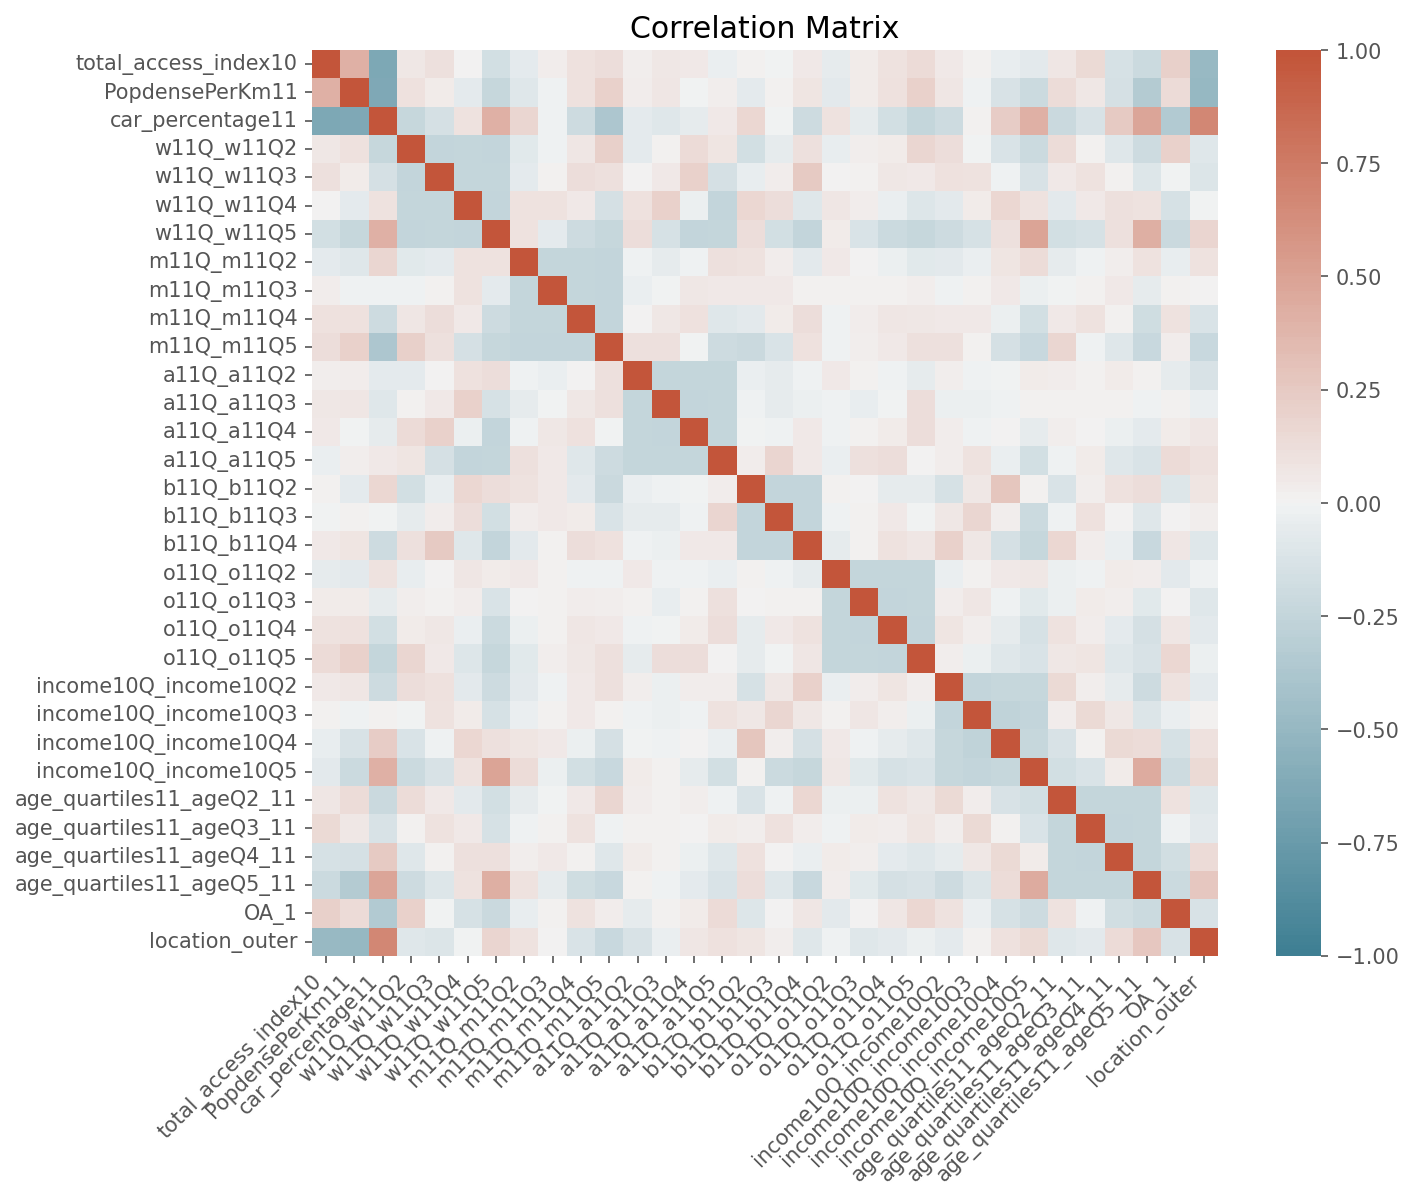

In [172]:
plt.figure(figsize=(10,8),dpi=150)
ax = sns.heatmap(reg_scaled.corr(), # plot a correlation matrix 
            annot=False, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True) # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix')


In [173]:
response = "total_access_index10"

In [174]:
#Using VIF to deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)
        
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        
        vif_df = vif_df.drop('const')
        
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [175]:
df_predictors_selected_VIF = drop_column_using_vif_(reg_scaled.drop(response, axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: w11Q_w11Q5
The columns remaining after VIF selection are:
Index(['PopdensePerKm11', 'car_percentage11', 'w11Q_w11Q2', 'w11Q_w11Q3',
       'w11Q_w11Q4', 'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
       'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5', 'b11Q_b11Q2',
       'b11Q_b11Q3', 'b11Q_b11Q4', 'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4',
       'o11Q_o11Q5', 'income10Q_income10Q2', 'income10Q_income10Q3',
       'income10Q_income10Q4', 'income10Q_income10Q5',
       'age_quartiles11_ageQ2_11', 'age_quartiles11_ageQ3_11',
       'age_quartiles11_ageQ4_11', 'age_quartiles11_ageQ5_11', 'OA_1',
       'location_outer'],
      dtype='object')


In [176]:
model = sm.OLS(endog=reg_scaled[[response]], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     total_access_index10   R-squared:                       0.581
Model:                              OLS   Adj. R-squared:                  0.579
Method:                   Least Squares   F-statistic:                     222.2
Date:                  Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                          22:57:14   Log-Likelihood:                -15801.
No. Observations:                  4835   AIC:                         3.166e+04
Df Residuals:                      4804   BIC:                         3.186e+04
Df Model:                            30                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.1587      0.770     45.680      0.000      33.650      36.668
PopdensePerKm11           -4.14e-05   1.85e-05     -2.243      0.025   -7.76e-05   -5.21e-06
car_percentage11            -0.5399      0.010    -51.603      0.000      -0.560      -0.519
w11Q_w11Q2                  -0.4098      0.294     -1.393      0.164      -0.986       0.167
w11Q_w11Q3                  -0.2414      0.317     -0.763      0.446      -0.862       0.379
w11Q_w11Q4                  -0.5597      0.310     -1.805      0.071      -1.168       0.048
m11Q_m11Q2                  -0.9004      0.310     -2.907      0.004      -1.507      -0.293
m11Q_m11Q3                  -1.1136      0.332     -3.356      0.001      -1.764      -0.463
m11Q_m11Q4                  -1.4572      0.362     -4.024      0.000      -2.167      -0.747
m11Q_m11Q5                  -1.6805      0.395     -4.250      0.000      -2.456      -0.905
a11Q_a11Q2                   0.5375      0.308      1.744      0.081      -0.067       1.142
a11Q_a11Q3                   1.4622      0.329      4.441      0.000       0.817       2.108
a11Q_a11Q4                   2.6810      0.346      7.738      0.000       2.002       3.360
a11Q_a11Q5                   3.1031      0.374      8.303      0.000       2.370       3.836
b11Q_b11Q2                   1.6535      0.290      5.709      0.000       1.086       2.221
b11Q_b11Q3                   1.0351      0.303      3.413      0.001       0.441       1.630
b11Q_b11Q4                   1.0185      0.296      3.444      0.001       0.439       1.598
o11Q_o11Q2                  -0.5784      0.324     -1.783      0.075      -1.214       0.058
o11Q_o11Q3                  -0.3306      0.347     -0.952      0.341      -1.012       0.350
o11Q_o11Q4                  -0.5725      0.359     -1.594      0.111      -1.277       0.132
o11Q_o11Q5                  -0.4193      0.367     -1.141      0.254      -1.140       0.301
income10Q_income10Q2         3.7689      0.308     12.254      0.000       3.166       4.372
income10Q_income10Q3         6.4348      0.330     19.497      0.000       5.788       7.082
income10Q_income10Q4         9.4484      0.374     25.256      0.000       8.715      10.182
income10Q_income10Q5        13.2117      0.421     31.345      0.000      12.385      14.038
age_quartiles11_ageQ2_11     1.2299      0.310      3.964      0.000       0.622       1.838
age_quartiles11_ageQ3_11     2.3220      0.328      7.070      0.000       1.678       2.966
age_quartiles11_ageQ4_11     2.5151      0.371      6.788      0.000       1.789       3.241
age_quartiles11_ageQ5_11     2.9943      0.414      7.227      0.000       2.182       3.807
OA_1                         1.3368      0.270      4.960      0.000       0.808     

---------

# Spatial lag models

$$ P_i = \alpha + \lambda \sum_j w_{ij} P_i + \beta X_i + \epsilon_i $$

In [177]:
from pysal.model import spreg
from pysal.lib import weights

/opt/conda/lib/python3.10/site-packages/spglm/utils.py:367: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if resetlist is not ():
/opt/conda/lib/python3.10/site-packages/spvcm/utils.py:149: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if np.isinf(ldet) or sgn is 0:
/opt/conda/lib/python3.10/site-packages/spvcm/abstracts.py:268: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if chains is () and kwargs != dict():
/opt/conda/lib/python3.10/site-packages/spvcm/abstracts.py:270: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if chains is not ():
/opt/conda/lib/python3.10/site-packages/spvcm/plotting.py:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if thin is None or thin is 0:


In [178]:
data = reg_df.copy()
data.shape

(4835, 94)

In [179]:
w = weights.KNN.from_dataframe(data, k=8)
w.transform = 'R'
w

In [180]:
w.neighbors[0]

[1935, 2825, 203, 3901, 2716, 1420, 2124, 1400]

In [182]:
OLS11_vars = [
   
# 'w11Q_w11Q1',
    'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 
    # 'w11Q_w11Q5', 
# 'm11Q_m11Q1',
    'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
# 'a11Q_a11Q1',
    'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
# 'b11Q_b11Q1',
    'b11Q_b11Q2', 'b11Q_b11Q3', 'b11Q_b11Q4', 'b11Q_b11Q5', 
# 'o11Q_o11Q1',
    'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5', 
# 'income10Q_income10Q1', 
    'income10Q_income10Q2', 'income10Q_income10Q3', 'income10Q_income10Q4', 'income10Q_income10Q5',
# 'age_quartiles11_ageQ1_11', 
    'age_quartiles11_ageQ2_11', 'age_quartiles11_ageQ3_11', 'age_quartiles11_ageQ4_11','age_quartiles11_ageQ5_11',

'PopdensePerKm11', 
    'car_percentage11',  
#both
# 'OA_0',
    'OA_1',
# 'location_inner',
    'location_outer'
#change
# 'AI_total_change', 
    # 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change',
]
OLS11 = spreg.OLS(data[['bus10']].values, data[OLS11_vars].values, 
      w=w, 
      spat_diag=True,
      name_y = 'bus10', name_x = OLS11_vars)
print(OLS11.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       bus10                Number of Observations:        4835
Mean dependent var  :      7.6179                Number of Variables   :          32
S.D. dependent var  :      5.3559                Degrees of Freedom    :        4803
R-squared           :      0.5116
Adjusted R-squared  :      0.5084
Sum squared residual:   67726.763                F-statistic           :    162.2825
Sigma-square        :      14.101                Prob(F-statistic)     :           0
S.E. of regression  :       3.755                Log likelihood        :  -13241.801
Sigma-square ML     :      14.008                Akaike info criterion :   26547.603
S.E of regression ML:      3.7427                Schwarz criterion     :   26755.079

-----------------------------------------------------------------------------

In [183]:
OLS21_vars = [

# 'w21Q_w21Q1', 
    'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4',
    # 'w21Q_w21Q5',
# 'm21Q_m21Q1',
    'm21Q_m21Q2', 'm21Q_m21Q3', 'm21Q_m21Q4', 'm21Q_m21Q5', 
# 'a21Q_a21Q1', 
    'a21Q_a21Q2', 'a21Q_a21Q3','a21Q_a21Q4', 'a21Q_a21Q5', 
# 'b21Q_b21Q1', 
    'b21Q_b21Q2', 'b21Q_b21Q3', 'b21Q_b21Q4', 'b21Q_b21Q5',
# 'o21Q_o21Q1',
    'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5',
# 'income19Q_income19Q1', 
    'income19Q_income19Q2', 'income19Q_income19Q3', 'income19Q_income19Q4', 'income19Q_income19Q5',
# 'age_quartiles21_ageQ1_21', 
    'age_quartiles21_ageQ2_21', 'age_quartiles21_ageQ3_21', 'age_quartiles21_ageQ4_21', 'age_quartiles21_ageQ5_21',

'PopdensePerKm21', 'car_percentage21', 
    
#both
# 'OA_0',
    'OA_1',
# 'location_inner',
    'location_outer'
#change
# 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change',
]
OLS21 = spreg.OLS(data[['total_access_index23']].values, data[OLS21_vars].values, 
      w=w, 
      spat_diag=True,
      name_y = 'total_access_index23', name_x = OLS21_vars)
print(OLS21.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index23                Number of Observations:        4835
Mean dependent var  :     13.2364                Number of Variables   :          32
S.D. dependent var  :     11.6486                Degrees of Freedom    :        4803
R-squared           :      0.5865
Adjusted R-squared  :      0.5839
Sum squared residual:  271201.325                F-statistic           :    219.7871
Sigma-square        :      56.465                Prob(F-statistic)     :           0
S.E. of regression  :       7.514                Log likelihood        :  -16595.793
Sigma-square ML     :      56.091                Akaike info criterion :   33255.585
S.E of regression ML:      7.4894                Schwarz criterion     :   33463.062

---------------------------------------------------------------------

### mapping the residuals

In [184]:
residual_map = data[[ 'LSOA11CD', 'geometry']]

In [185]:
residual_map["resid"] = OLS11.u

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [186]:
residual_map.head(2)

LSOA11CD                                           geometry  \
0  E01002137  POLYGON ((515847.044 187490.377, 515697.919 18...   
1  E01001728  POLYGON ((534551.506 186971.945, 534578.548 18...   

                                     resid  
0                                   6.2600  
1                                  -0.6160

Text(0.5, 0.98, 'residual map of 2011 OLS regression')

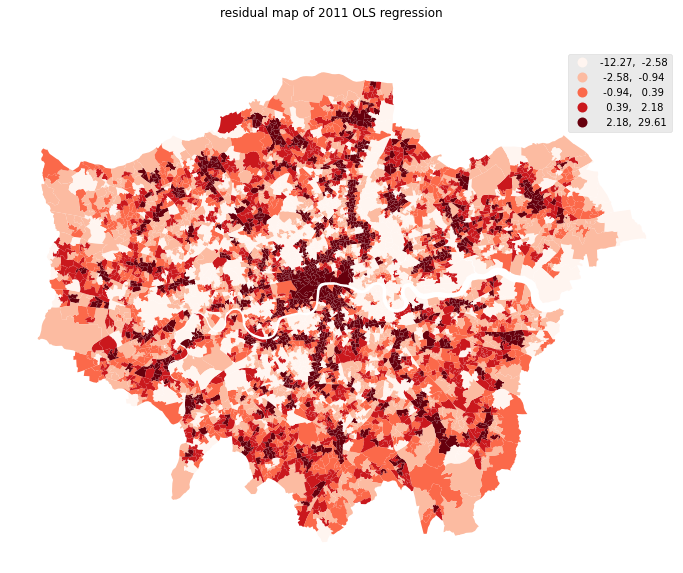

In [187]:
f = plt.figure(dpi = 72)
f.set_size_inches(12,10)

ax1 = f.add_subplot()
residual_map.plot(column='resid', legend=True, ax = ax1,cmap="Reds", 
                        scheme="quantiles",
                        aspect=1)
ax1.set_axis_off()

f.subplots_adjust(top=1)
f.suptitle("residual map of 2011 OLS regression")

### Spatial lag models

In [188]:
lag11_vars = [
  
# 'w11Q_w11Q1',
    'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 
    # 'w11Q_w11Q5', 
# 'm11Q_m11Q1',
    'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
# 'a11Q_a11Q1',
    'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
# 'b11Q_b11Q1',
    'b11Q_b11Q2', 'b11Q_b11Q3', 'b11Q_b11Q4', 
    'b11Q_b11Q5', 
# 'o11Q_o11Q1',
    'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5', 
# 'income10Q_income10Q1', 
    'income10Q_income10Q2', 'income10Q_income10Q3', 'income10Q_income10Q4', 'income10Q_income10Q5',
# 'age_quartiles11_ageQ1_11', 
    'age_quartiles11_ageQ2_11', 'age_quartiles11_ageQ3_11', 'age_quartiles11_ageQ4_11','age_quartiles11_ageQ5_11',

'PopdensePerKm11', 
    'car_percentage11',
#both
# 'OA_0',
    'OA_1',
# 'location_inner',
    'location_outer'
#change
# 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change',
]
lag11 = spreg.ML_Lag(data[['total_access_index10']].values, data[lag11_vars].values, 
                  w=w,
                  name_y = 'total_access_index10', name_x = lag11_vars)
print(lag11.summary)

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index10                Number of Observations:        4835
Mean dependent var  :     11.3852                Number of Variables   :          33
S.D. dependent var  :      9.8192                Degrees of Freedom    :        4802
Pseudo R-squared    :      0.8313
Spatial Pseudo R-squared:  0.5601
Sigma-square ML     :      16.420                Log likelihood        :  -13940.752
S.E of regression   :       4.052                Akaike info criterion :   27947.504
                                                 Schwarz criterion     :   28161.464

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------

In [371]:
lag21_vars = [

# 'w21Q_w21Q1', 
    'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4',
    # 'w21Q_w21Q5',
# 'm21Q_m21Q1', 
    'm21Q_m21Q2', 'm21Q_m21Q3', 'm21Q_m21Q4', 'm21Q_m21Q5', 
# 'a21Q_a21Q1',
    'a21Q_a21Q2', 'a21Q_a21Q3','a21Q_a21Q4', 'a21Q_a21Q5', 
# 'b21Q_b21Q1',
    'b21Q_b21Q2', 'b21Q_b21Q3', 'b21Q_b21Q4', 'b21Q_b21Q5',
# 'o21Q_o21Q1', 
    'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5',
# 'income19Q_income19Q1', 
    'income19Q_income19Q2', 'income19Q_income19Q3', 'income19Q_income19Q4', 'income19Q_income19Q5',
# 'age_quartiles21_ageQ1_21', 
    'age_quartiles21_ageQ2_21', 'age_quartiles21_ageQ3_21', 'age_quartiles21_ageQ4_21', 'age_quartiles21_ageQ5_21',

'PopdensePerKm21', 'car_percentage21', 
    
#both
# 'OA_0',
    'OA_1',
# 'location_inner',
    'location_outer'
#change
# 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change',
]
lag21 = spreg.ML_Lag(data[['total_access_index23']].values, data[lag21_vars].values, 
                  w=w,
                  name_y = 'total_access_index23', name_x = lag21_vars)
print(lag21.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index23                Number of Observations:        4835
Mean dependent var  :     13.2364                Number of Variables   :          33
S.D. dependent var  :     11.6486                Degrees of Freedom    :        4802
Pseudo R-squared    :      0.8733
Spatial Pseudo R-squared:  0.5262
Sigma-square ML     :      17.391                Log likelihood        :  -14140.004
S.E of regression   :       4.170                Akaike info criterion :   28346.008
                                                 Schwarz criterion     :   28559.968

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------

### Spatial error models

In [162]:
error11_vars = [
  
# 'w11Q_w11Q1',
    'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 
    # 'w11Q_w11Q5', 
# 'm11Q_m11Q1',
    'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
# 'a11Q_a11Q1',
    'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
# 'b11Q_b11Q1',
    'b11Q_b11Q2', 'b11Q_b11Q3', 'b11Q_b11Q4', 'b11Q_b11Q5', 
# 'o11Q_o11Q1',
    'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5', 
# 'income10Q_income10Q1', 
    'income10Q_income10Q2', 'income10Q_income10Q3', 'income10Q_income10Q4', 'income10Q_income10Q5',
# 'age_quartiles11_ageQ1_11', 
    'age_quartiles11_ageQ2_11', 'age_quartiles11_ageQ3_11', 'age_quartiles11_ageQ4_11','age_quartiles11_ageQ5_11',

'PopdensePerKm11', 
    'car_percentage11',

#both
# 'OA_0',
    'OA_1',
# 'location_inner',
    'location_outer'
#change
# 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change',
]
error11 = spreg.ML_Error(data[['total_access_index10']].values, data[error11_vars].values, 
                  w=w,
                  name_y = 'total_access_index10', name_x = error11_vars)
print(error11.summary)

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index10                Number of Observations:        4835
Mean dependent var  :     11.3852                Number of Variables   :          32
S.D. dependent var  :      9.8192                Degrees of Freedom    :        4803
Pseudo R-squared    :      0.5500
Sigma-square ML     :      15.922                Log likelihood        :  -13984.523
S.E of regression   :       3.990                Akaike info criterion :   28033.046
                                                 Schwarz criterion     :   28240.522

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------

In [163]:
error21_vars = [
# 'w21Q_w21Q1', 
    'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4', 
    # 'w21Q_w21Q5',
# 'm21Q_m21Q1', 
    'm21Q_m21Q2', 'm21Q_m21Q3', 'm21Q_m21Q4', 'm21Q_m21Q5', 
# 'a21Q_a21Q1',
    'a21Q_a21Q2', 'a21Q_a21Q3','a21Q_a21Q4', 'a21Q_a21Q5', 
# 'b21Q_b21Q1',
    'b21Q_b21Q2', 'b21Q_b21Q3', 'b21Q_b21Q4', 'b21Q_b21Q5',
# 'o21Q_o21Q1', 
    'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5',
# 'income19Q_income19Q1', 
    'income19Q_income19Q2', 'income19Q_income19Q3', 'income19Q_income19Q4', 'income19Q_income19Q5',
# 'age_quartiles21_ageQ1_21', 
    'age_quartiles21_ageQ2_21', 'age_quartiles21_ageQ3_21', 'age_quartiles21_ageQ4_21', 'age_quartiles21_ageQ5_21',

'PopdensePerKm21', 'car_percentage21', 
    
#both
# 'OA_0',
    'OA_1',
# 'location_inner',
    'location_outer'
]
error21 = spreg.ML_Error(data[['total_access_index23']].values, data[error21_vars].values, 
                  w=w,
                  name_y = 'total_access_index23', name_x = error21_vars)
print(error21.summary)

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :total_access_index23                Number of Observations:        4835
Mean dependent var  :     13.2364                Number of Variables   :          32
S.D. dependent var  :     11.6486                Degrees of Freedom    :        4803
Pseudo R-squared    :      0.5526
Sigma-square ML     :      16.396                Log likelihood        :  -14117.645
S.E of regression   :       4.049                Akaike info criterion :   28299.290
                                                 Schwarz criterion     :   28506.767

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------

six models:
- OLS11, OLS21
- lag11, lag21
- error11, error21

In [251]:
model = OLS11
print(spreg.diagnostics.r2(model))
print("%12.12f"%spreg.diagnostics.f_stat(model)[1])
from pysal.explore import esda
mi = esda.Moran(model.u, w)
print(mi.I)
print(mi.p_norm)
print(mi.p_sim)
print(mi.z_norm)

0.5825546503765633
0.000000000000
0.47442892780344936
0.0
0.001
68.43254165543932


___

### Coef graph

In [372]:
X = np.array(data[[
                   'w11Q_w11Q1', 'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 'w11Q_w11Q5',
                   'm11Q_m11Q1', 'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
                   'a11Q_a11Q1', 'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
                   'b11Q_b11Q1', 'b11Q_b11Q2', 'b11Q_b11Q3', 'b11Q_b11Q4', 'b11Q_b11Q5', 
                   'o11Q_o11Q1', 'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5',

                   # 'w21Q_w21Q1', 'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4', 'w21Q_w21Q5',
                   # 'm21Q_m21Q1', 'm21Q_m21Q2', 'm21Q_m21Q3', 'm21Q_m21Q4', 'm21Q_m21Q5', 
                   # 'a21Q_a21Q1', 'a21Q_a21Q2', 'a21Q_a21Q3','a21Q_a21Q4', 'a21Q_a21Q5',
                   # 'b21Q_b21Q1', 'b21Q_b21Q2', 'b21Q_b21Q3', 'b21Q_b21Q4', 'b21Q_b21Q5',
                   # 'o21Q_o21Q1', 'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5'
                  ]])

import scipy.stats as stats
model = lag11
# Calculate confidence intervals manually
confidence_level = 0.95
alpha = 1 - confidence_level
n, k = X.shape
df_resid = n - k
critical_value = stats.t.ppf(1 - alpha / 2, df_resid)

coefficients = model.betas
std_errors = np.sqrt(model.vm.diagonal())
variable_names = model.name_x
confidence_intervals = []

for i, coef in enumerate(coefficients):
    lower_bound = coef - critical_value * std_errors[i]
    upper_bound = coef + critical_value * std_errors[i]
    confidence_intervals.append((variable_names[i], coef, lower_bound, upper_bound))

# Create a DataFrame with variable names, coefficients, and confidence interval bounds
confidence_df = pd.DataFrame(confidence_intervals, columns=['Variable', 'Coefficient', 'Lower Bound', 'Upper Bound'])

# Convert numeric columns to float
confidence_df['Coefficient'] = confidence_df['Coefficient'].astype(float)
confidence_df['Lower Bound'] = confidence_df['Lower Bound'].astype(float)
confidence_df['Upper Bound'] = confidence_df['Upper Bound'].astype(float)
# confidence_df

In [373]:
err_series = []  # List to store coefficient - lower bound values
for i, (var_name, coef, lower, upper) in enumerate(confidence_intervals):
    err = coef - lower  # Calculate coefficient - lower bound
    err_series.append(err)  # Append to the error series list

# Create a Series for coefficient errors
err_series = pd.Series(err_series, name='Coefficient Error')
err_series.astype(float)

coef_df = pd.DataFrame({'coef': confidence_df.Coefficient[1:],
                        'err': err_series.values[1:],
                        'varname': confidence_df.Variable[1:]
                       })
coef_df['err'] = coef_df['err'].astype(float)
coef_df['year'] = '2011'

coef_df.loc[0] = [0,0,'WQ1',2011]
coef_df.loc[3.25] = [0,0,'WQ5',2011]
coef_df.loc[4.5-1] = [0,0,'MQ1',2011]
coef_df.loc[8.5-1] = [0,0,'AQ1',2011]
coef_df.loc[12.5-1] = [0,0,'BQ1',2011]
coef_df.loc[16.5-1] = [0,0,'OQ1',2011]
coef_df.loc[19.5] = [0,0,'incomeQ1',2011]
coef_df.loc[23.5] = [0,0,'ageQ1',2011]
coef_df = coef_df.sort_index().reset_index(drop=True)

# Drop rows with indices 26 to 33
indices_to_drop = list(range(25,40) )

# indices_to_drop = list(range(0, 25) )+ list(range(35,40))
coef_df = coef_df.drop(indices_to_drop)

coef_df

coef  \
0                                    0.0000   
1                                   -0.2943   
2                                   -0.1115   
3                                   -0.2625   
4                                    0.0000   
5                                    0.0000   
6                                   -0.5373   
7                                   -0.8731   
8                                   -0.8073   
9                                   -0.8646   
10                                   0.0000   
11                                   0.4788   
12                                   0.5936   
13                                   1.1127   
14                                   1.3761   
15                                   0.0000   
16                                   0.4834   
17                                  -0.1049   
18                                  -0.0886   
19                                  -0.5077   
20                                   0.0000   
21                                  -0.4304   
22                                  -0.4911   
23                                  -0.6930   
24                                  -0.9109   

                                        err     varname  year  
0                                    0.0000         WQ1  2011  
1                                    0.3698  w11Q_w11Q2  2011  
2                                    0.3949  w11Q_w11Q3  2011  
3                                    0.3880  w11Q_w11Q4  2011  
4                                    0.0000         WQ5  2011  
5                                    0.0000         MQ1  2011  
6                                    0.3881  m11Q_m11Q2  2011  
7                                    0.4189  m11Q_m11Q3  2011  
8                                    0.4670  m11Q_m11Q4  2011  
9                                    0.5251  m11Q_m11Q5  2011  
10                                   0.0000         AQ1  2011  
11                                   0.3843  a11Q_a11Q2  2011  
12                                   0.4112  a11Q_a11Q3  2011  
13                                   0.4344  a11Q_a11Q4  2011  
14                                   0.4698  a11Q_a11Q5  2011  
15                                   0.0000         BQ1  2011  
16                                   0.4265  b11Q_b11Q2  2011  
17                                   0.5085  b11Q_b11Q3  2011  
18                                   0.5685  b11Q_b11Q4  2011  
19                                   0.6322  b11Q_b11Q5  2011  
20                                   0.0000         OQ1  2011  
21                                   0.4044  o11Q_o11Q2  2011  
22                                   0.4330  o11Q_o11Q3  2011  
23                                   0.4476  o11Q_o11Q4  2011  
24                                   0.4583  o11Q_o11Q5  2011

In [374]:
X = np.array(data[[
                   # 'w11Q_w11Q1', 'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 'w11Q_w11Q5',
                   # 'm11Q_m11Q1', 'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
                   # 'a11Q_a11Q1', 'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
                   # 'b11Q_b11Q1', 'b11Q_b11Q2', 'b11Q_b11Q3', 'b11Q_b11Q4', 'b11Q_b11Q5', 
                   # 'o11Q_o11Q1', 'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5',

                   'w21Q_w21Q1', 'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4', 'w21Q_w21Q5',
                   'm21Q_m21Q1', 'm21Q_m21Q2', 'm21Q_m21Q3', 'm21Q_m21Q4', 'm21Q_m21Q5', 
                   'a21Q_a21Q1', 'a21Q_a21Q2', 'a21Q_a21Q3','a21Q_a21Q4', 'a21Q_a21Q5',
                   'b21Q_b21Q1', 'b21Q_b21Q2', 'b21Q_b21Q3', 'b21Q_b21Q4', 'b21Q_b21Q5',
                   'o21Q_o21Q1', 'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5'
                  ]])

import scipy.stats as stats
model = lag21
# Calculate confidence intervals manually
confidence_level = 0.95
alpha = 1 - confidence_level
n, k = X.shape
df_resid = n - k
critical_value = stats.t.ppf(1 - alpha / 2, df_resid)

coefficients = model.betas
std_errors = np.sqrt(model.vm.diagonal())
variable_names = model.name_x
confidence_intervals = []

for i, coef in enumerate(coefficients):
    lower_bound = coef - critical_value * std_errors[i]
    upper_bound = coef + critical_value * std_errors[i]
    confidence_intervals.append((variable_names[i], coef, lower_bound, upper_bound))

# Create a DataFrame with variable names, coefficients, and confidence interval bounds
confidence_df2 = pd.DataFrame(confidence_intervals, columns=['Variable', 'Coefficient', 'Lower Bound', 'Upper Bound'])

# Convert numeric columns to float
confidence_df2['Coefficient'] = confidence_df2['Coefficient'].astype(float)
confidence_df2['Lower Bound'] = confidence_df2['Lower Bound'].astype(float)
confidence_df2['Upper Bound'] = confidence_df2['Upper Bound'].astype(float)
# confidence_df2

In [375]:
err_series = []  # List to store coefficient - lower bound values
for i, (var_name, coef, lower, upper) in enumerate(confidence_intervals):
    err = coef - lower  # Calculate coefficient - lower bound
    err_series.append(err)  # Append to the error series list

# Create a Series for coefficient errors
err_series = pd.Series(err_series, name='Coefficient Error')
err_series.astype(float)

coef_df2 = pd.DataFrame({'coef': confidence_df2.Coefficient[1:],
                        'err': err_series.values[1:],
                        'varname': confidence_df2.Variable[1:]
                       })
coef_df2['err'] = coef_df2['err'].astype(float)
coef_df2['year'] = '2021'

coef_df2.loc[0] = [0,0,'WQ1',2021]
coef_df2.loc[3.25] = [0,0,'WQ5',2021]
coef_df2.loc[4.5-1] = [0,0,'MQ1',2021]
coef_df2.loc[8.5-1] = [0,0,'AQ1',2021]
coef_df2.loc[12.5-1] = [0,0,'BQ1',2021]
coef_df2.loc[16.5-1] = [0,0,'OQ1',2021]
coef_df2.loc[19.5] = [0,0,'incomeQ1',2021]
coef_df2.loc[23.5] = [0,0,'ageQ1',2021]
coef_df2 = coef_df2.sort_index().reset_index(drop=True)

# # Drop rows with indices 26 to 33
indices_to_drop = list(range(25,40) )

# indices_to_drop = list(range(0, 23) )+ list(range(33,38))
coef_df2 = coef_df2.drop(indices_to_drop)

coef_df2

coef  \
0                                    0.0000   
1                                   -0.0257   
2                                    0.2777   
3                                   -0.0563   
4                                    0.0000   
5                                    0.0000   
6                                   -0.3714   
7                                   -0.5832   
8                                   -0.5206   
9                                   -0.9137   
10                                   0.0000   
11                                   0.2728   
12                                   0.7253   
13                                   1.1427   
14                                   1.2200   
15                                   0.0000   
16                                   0.2620   
17                                  -0.4233   
18                                  -0.2591   
19                                   0.0006   
20                                   0.0000   
21                                  -0.8305   
22                                  -0.8875   
23                                  -0.9067   
24                                  -1.3214   

                                        err     varname  year  
0                                    0.0000         WQ1  2021  
1                                    0.3736  w21Q_w21Q2  2021  
2                                    0.3953  w21Q_w21Q3  2021  
3                                    0.3832  w21Q_w21Q4  2021  
4                                    0.0000         WQ5  2021  
5                                    0.0000         MQ1  2021  
6                                    0.3949  m21Q_m21Q2  2021  
7                                    0.4264  m21Q_m21Q3  2021  
8                                    0.4623  m21Q_m21Q4  2021  
9                                    0.5033  m21Q_m21Q5  2021  
10                                   0.0000         AQ1  2021  
11                                   0.3827  a21Q_a21Q2  2021  
12                                   0.4045  a21Q_a21Q3  2021  
13                                   0.4390  a21Q_a21Q4  2021  
14                                   0.4979  a21Q_a21Q5  2021  
15                                   0.0000         BQ1  2021  
16                                   0.4245  b21Q_b21Q2  2021  
17                                   0.4815  b21Q_b21Q3  2021  
18                                   0.5373  b21Q_b21Q4  2021  
19                                   0.5969  b21Q_b21Q5  2021  
20                                   0.0000         OQ1  2021  
21                                   0.4099  o21Q_o21Q2  2021  
22                                   0.4356  o21Q_o21Q3  2021  
23                                   0.4455  o21Q_o21Q4  2021  
24                                   0.4455  o21Q_o21Q5  2021

In [376]:
result_df = pd.concat([coef_df2, coef_df], axis=0)
varname_mapping = {

    'w11Q_w11Q2': 'WQ2','w11Q_w11Q3': 'WQ3', 'w11Q_w11Q4': 'WQ4','w11Q_w11Q5': 'WQ5',
    'm11Q_m11Q2': 'MQ2','m11Q_m11Q3': 'MQ3', 'm11Q_m11Q4': 'MQ4','m11Q_m11Q5': 'MQ5',
    'a11Q_a11Q2': 'AQ2','a11Q_a11Q3': 'AQ3', 'a11Q_a11Q4': 'AQ4','a11Q_a11Q5': 'AQ5',
    'b11Q_b11Q2': 'BQ2','b11Q_b11Q3': 'BQ3', 'b11Q_b11Q4': 'BQ4','b11Q_b11Q5': 'BQ5',
    'o11Q_o11Q2': 'OQ2','o11Q_o11Q3': 'OQ3', 'o11Q_o11Q4': 'OQ4','o11Q_o11Q5': 'OQ5',
    
    'w21Q_w21Q2': 'WQ2','w21Q_w21Q3': 'WQ3', 'w21Q_w21Q4': 'WQ4','w21Q_w21Q5': 'WQ5',
    'm21Q_m21Q2': 'MQ2','m21Q_m21Q3': 'MQ3', 'm21Q_m21Q4': 'MQ4','m21Q_m21Q5': 'MQ5',
    'a21Q_a21Q2': 'AQ2','a21Q_a21Q3': 'AQ3', 'a21Q_a21Q4': 'AQ4','a21Q_a21Q5': 'AQ5',
    'b21Q_b21Q2': 'BQ2','b21Q_b21Q3': 'BQ3', 'b21Q_b21Q4': 'BQ4','b21Q_b21Q5': 'BQ5',
    'o21Q_o21Q2': 'OQ2','o21Q_o21Q3': 'OQ3', 'o21Q_o21Q4': 'OQ4','o21Q_o21Q5': 'OQ5',

}

# Replace varname values using the mapping dictionary
result_df['varname'] = result_df['varname'].replace(varname_mapping)
result_df['year'] = result_df['year'].astype(int)
# result_df = result_df.reset_index(drop=True)
result_df

coef  \
0                                    0.0000   
1                                   -0.0257   
2                                    0.2777   
3                                   -0.0563   
4                                    0.0000   
5                                    0.0000   
6                                   -0.3714   
7                                   -0.5832   
8                                   -0.5206   
9                                   -0.9137   
10                                   0.0000   
11                                   0.2728   
12                                   0.7253   
13                                   1.1427   
14                                   1.2200   
15                                   0.0000   
16                                   0.2620   
17                                  -0.4233   
18                                  -0.2591   
19                                   0.0006   
20                                   0.0000   
21                                  -0.8305   
22                                  -0.8875   
23                                  -0.9067   
24                                  -1.3214   
0                                    0.0000   
1                                   -0.2943   
2                                   -0.1115   
3                                   -0.2625   
4                                    0.0000   
5                                    0.0000   
6                                   -0.5373   
7                                   -0.8731   
8                                   -0.8073   
9                                   -0.8646   
10                                   0.0000   
11                                   0.4788   
12                                   0.5936   
13                                   1.1127   
14                                   1.3761   
15                                   0.0000   
16                                   0.4834   
17                                  -0.1049   
18                                  -0.0886   
19                                  -0.5077   
20                                   0.0000   
21                                  -0.4304   
22                                  -0.4911   
23                                  -0.6930   
24                                  -0.9109   

                                        err varname  year  
0                                    0.0000     WQ1  2021  
1                                    0.3736     WQ2  2021  
2                                    0.3953     WQ3  2021  
3                                    0.3832     WQ4  2021  
4                                    0.0000     WQ5  2021  
5                                    0.0000     MQ1  2021  
6                                    0.3949     MQ2  2021  
7                                    0.4264     MQ3  2021  
8                                    0.4623     MQ4  2021  
9                                    0.5033     MQ5  2021  
10                                   0.0000     AQ1  2021  
11                                   0.3827     AQ2  2021  
12                                   0.4045     AQ3  2021  
13                                   0.4390     AQ4  2021  
14                                   0.4979     AQ5  2021  
15                                   0.0000     BQ1  2021  
16                                   0.4245     BQ2  2021  
17                                   0.4815     BQ3  2021  
18                                   0.5373     BQ4  2021  
19                                   0.5969     BQ5  2021  
20                                   0.0000     OQ1  2021  
21                                   0.4099     OQ2  2021  
22                                   0.4356     OQ3  2021  
23                                   0.4455     OQ4  2021  
24                                   0.4455     OQ5  2021  
0                                    0.0000     WQ1  2011  
1                    

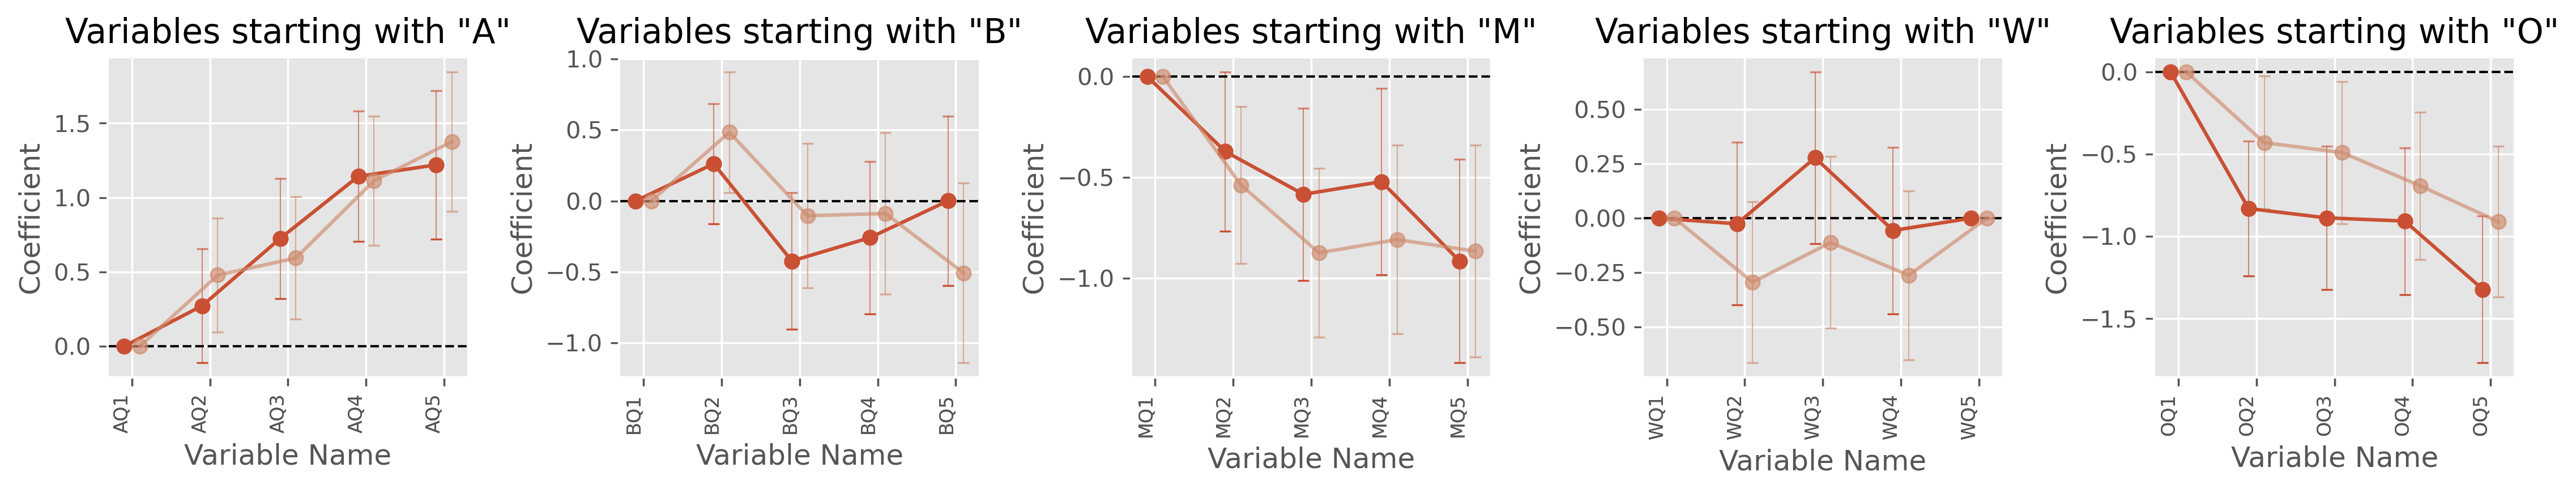

In [377]:
starting_letters = ['A','B','M','W','O']

# Create a new plot for all the graphs
fig, axes = plt.subplots(ncols=len(starting_letters), figsize=(3 * len(starting_letters), 3), dpi=300)

# Iterate over unique starting letters and create separate graphs
for i, starting_letter in enumerate(starting_letters):
    filtered_df = result_df[result_df['varname'].str.startswith(starting_letter)]
    
    ax = axes[i] if len(starting_letters) > 1 else axes
    
    # Plot the data for each year with lines connecting the dots
    for year in filtered_df['year'].unique():
        year_data = filtered_df[filtered_df['year'] == year]
        
        if year == 2021:
            x_offset = -0.1  # Slight shift to the left for 2021 data
            point_color = '#ca5033'  # Color for the year 2021 data
        else:
            x_offset = 0.1   # Default shift to the right for other years
            point_color = '#ce8b6d'  # Color for other years
        
        ax.errorbar(year_data.index + x_offset, year_data['coef'], yerr=year_data['err'],
                    elinewidth=0.5, markeredgewidth=0.8,
                    fmt='-o', capsize=2.5, label=f'Coefficient - {year}', alpha=0.65, color=point_color)
    
    ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
    ax.set_xticks(filtered_df.index)
    ax.set_xticklabels(filtered_df['varname'], fontsize=8, rotation=90, ha='right')  # Restore x-axis labels
    ax.set_ylabel('Coefficient', fontsize=12)  # Restore y-axis label
    ax.set_xlabel('Variable Name', fontsize=12)  # Restore x-axis label
    ax.set_title(f'Variables starting with "{starting_letter}"')

    # Set alpha back to 1 for the clear dots
    ax.lines[::2][0].set_alpha(1)  # Clear dots
    ax.lines[1::2][0].set_alpha(1)  # Connected dots

plt.tight_layout()

# Save the combined figure
# fig.savefig("viz/edit/total_ethnic.png", dpi=300)


### income graph.

In [362]:
X = np.array(data[[
                   'w11Q_w11Q1', 'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 'w11Q_w11Q5',
                   'm11Q_m11Q1', 'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
                   'a11Q_a11Q1', 'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
                   'b11Q_b11Q1', 'b11Q_b11Q2', 'b11Q_b11Q3', 'b11Q_b11Q4', 'b11Q_b11Q5', 
                   'o11Q_o11Q1', 'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5',

                   # 'w21Q_w21Q1', 'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4', 'w21Q_w21Q5',
                   # 'm21Q_m21Q1', 'm21Q_m21Q2', 'm21Q_m21Q3', 'm21Q_m21Q4', 'm21Q_m21Q5', 
                   # 'a21Q_a21Q1', 'a21Q_a21Q2', 'a21Q_a21Q3','a21Q_a21Q4', 'a21Q_a21Q5',
                   # 'b21Q_b21Q1', 'b21Q_b21Q2', 'b21Q_b21Q3', 'b21Q_b21Q4', 'b21Q_b21Q5',
                   # 'o21Q_o21Q1', 'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5'
                  ]])

import scipy.stats as stats
model = lag11
# Calculate confidence intervals manually
confidence_level = 0.95
alpha = 1 - confidence_level
n, k = X.shape
df_resid = n - k
critical_value = stats.t.ppf(1 - alpha / 2, df_resid)

coefficients = model.betas
std_errors = np.sqrt(model.vm.diagonal())
variable_names = model.name_x
confidence_intervals = []

for i, coef in enumerate(coefficients):
    lower_bound = coef - critical_value * std_errors[i]
    upper_bound = coef + critical_value * std_errors[i]
    confidence_intervals.append((variable_names[i], coef, lower_bound, upper_bound))

# Create a DataFrame with variable names, coefficients, and confidence interval bounds
confidence_df = pd.DataFrame(confidence_intervals, columns=['Variable', 'Coefficient', 'Lower Bound', 'Upper Bound'])

# Convert numeric columns to float
confidence_df['Coefficient'] = confidence_df['Coefficient'].astype(float)
confidence_df['Lower Bound'] = confidence_df['Lower Bound'].astype(float)
confidence_df['Upper Bound'] = confidence_df['Upper Bound'].astype(float)
# confidence_df

In [363]:
err_series = []  # List to store coefficient - lower bound values
for i, (var_name, coef, lower, upper) in enumerate(confidence_intervals):
    err = coef - lower  # Calculate coefficient - lower bound
    err_series.append(err)  # Append to the error series list

# Create a Series for coefficient errors
err_series = pd.Series(err_series, name='Coefficient Error')
err_series.astype(float)

coef_df = pd.DataFrame({'coef': confidence_df.Coefficient[1:],
                        'err': err_series.values[1:],
                        'varname': confidence_df.Variable[1:]
                       })
coef_df['err'] = coef_df['err'].astype(float)
coef_df['year'] = '2011'

coef_df.loc[0] = [0,0,'WQ1',2011]
coef_df.loc[3.25] = [0,0,'WQ5',2011]
coef_df.loc[4.5-1] = [0,0,'MQ1',2011]
coef_df.loc[8.5-1] = [0,0,'AQ1',2011]
coef_df.loc[12.5-1] = [0,0,'BQ1',2011]
coef_df.loc[16.5-1] = [0,0,'OQ1',2011]
coef_df.loc[19.5] = [0,0,'incomeQ1',2011]
coef_df.loc[23.5] = [0,0,'ageQ1',2011]
coef_df = coef_df.sort_index().reset_index(drop=True)

# # Drop rows with indices 26 to 33
# indices_to_drop = list(range(25,38) )

indices_to_drop = list(range(0, 25) )+ list(range(35,40))
coef_df = coef_df.drop(indices_to_drop)

coef_df

coef  \
25                                   0.0000   
26                                   0.3193   
27                                   0.4691   
28                                   0.6845   
29                                   0.8828   
30                                   0.0000   
31                                   0.1602   
32                                   0.2548   
33                                   0.1981   
34                                   0.2082   

                                        err                   varname  year  
25                                   0.0000                  incomeQ1  2011  
26                                   0.1376      income10Q_income10Q2  2011  
27                                   0.1515      income10Q_income10Q3  2011  
28                                   0.1814      income10Q_income10Q4  2011  
29                                   0.2242      income10Q_income10Q5  2011  
30                                   0.0000                     ageQ1  2011  
31                                   0.1377  age_quartiles11_ageQ2_11  2011  
32                                   0.1468  age_quartiles11_ageQ3_11  2011  
33                                   0.1660  age_quartiles11_ageQ4_11  2011  
34                                   0.1862  age_quartiles11_ageQ5_11  2011

In [364]:
X = np.array(data[[
                   # 'w11Q_w11Q1', 'w11Q_w11Q2', 'w11Q_w11Q3', 'w11Q_w11Q4', 'w11Q_w11Q5',
                   # 'm11Q_m11Q1', 'm11Q_m11Q2', 'm11Q_m11Q3', 'm11Q_m11Q4', 'm11Q_m11Q5',
                   # 'a11Q_a11Q1', 'a11Q_a11Q2', 'a11Q_a11Q3', 'a11Q_a11Q4', 'a11Q_a11Q5',
                   # 'b11Q_b11Q1', 'b11Q_b11Q2', 'b11Q_b11Q3', 'b11Q_b11Q4', 'b11Q_b11Q5', 
                   # 'o11Q_o11Q1', 'o11Q_o11Q2', 'o11Q_o11Q3', 'o11Q_o11Q4', 'o11Q_o11Q5',

                   'w21Q_w21Q1', 'w21Q_w21Q2', 'w21Q_w21Q3', 'w21Q_w21Q4', 'w21Q_w21Q5',
                   'm21Q_m21Q1', 'm21Q_m21Q2', 'm21Q_m21Q3', 'm21Q_m21Q4', 'm21Q_m21Q5', 
                   'a21Q_a21Q1', 'a21Q_a21Q2', 'a21Q_a21Q3','a21Q_a21Q4', 'a21Q_a21Q5',
                   'b21Q_b21Q1', 'b21Q_b21Q2', 'b21Q_b21Q3', 'b21Q_b21Q4', 'b21Q_b21Q5',
                   'o21Q_o21Q1', 'o21Q_o21Q2', 'o21Q_o21Q3', 'o21Q_o21Q4', 'o21Q_o21Q5'
                  ]])

import scipy.stats as stats
model = lag21
# Calculate confidence intervals manually
confidence_level = 0.95
alpha = 1 - confidence_level
n, k = X.shape
df_resid = n - k
critical_value = stats.t.ppf(1 - alpha / 2, df_resid)

coefficients = model.betas
std_errors = np.sqrt(model.vm.diagonal())
variable_names = model.name_x
confidence_intervals = []

for i, coef in enumerate(coefficients):
    lower_bound = coef - critical_value * std_errors[i]
    upper_bound = coef + critical_value * std_errors[i]
    confidence_intervals.append((variable_names[i], coef, lower_bound, upper_bound))

# Create a DataFrame with variable names, coefficients, and confidence interval bounds
confidence_df2 = pd.DataFrame(confidence_intervals, columns=['Variable', 'Coefficient', 'Lower Bound', 'Upper Bound'])

# Convert numeric columns to float
confidence_df2['Coefficient'] = confidence_df2['Coefficient'].astype(float)
confidence_df2['Lower Bound'] = confidence_df2['Lower Bound'].astype(float)
confidence_df2['Upper Bound'] = confidence_df2['Upper Bound'].astype(float)
# confidence_df2

In [367]:
err_series = []  # List to store coefficient - lower bound values
for i, (var_name, coef, lower, upper) in enumerate(confidence_intervals):
    err = coef - lower  # Calculate coefficient - lower bound
    err_series.append(err)  # Append to the error series list

# Create a Series for coefficient errors
err_series = pd.Series(err_series, name='Coefficient Error')
err_series.astype(float)

coef_df2 = pd.DataFrame({'coef': confidence_df2.Coefficient[1:],
                        'err': err_series.values[1:],
                        'varname': confidence_df2.Variable[1:]
                       })
coef_df2['err'] = coef_df2['err'].astype(float)
coef_df2['year'] = '2021'

coef_df2.loc[0] = [0,0,'WQ1',2021]
coef_df2.loc[3.25] = [0,0,'WQ5',2021]
coef_df2.loc[4.5-1] = [0,0,'MQ1',2021]
coef_df2.loc[8.5-1] = [0,0,'AQ1',2021]
coef_df2.loc[12.5-1] = [0,0,'BQ1',2021]
coef_df2.loc[16.5-1] = [0,0,'OQ1',2021]
coef_df2.loc[19.5] = [0,0,'incomeQ1',2021]
coef_df2.loc[23.5] = [0,0,'ageQ1',2021]
coef_df2 = coef_df2.sort_index().reset_index(drop=True)

# # Drop rows with indices 26 to 33
# indices_to_drop = list(range(25,38) )

indices_to_drop = list(range(0, 25) )+ list(range(35,40))
coef_df2 = coef_df2.drop(indices_to_drop)

coef_df2

coef  \
25                                   0.0000   
26                                   0.0959   
27                                   0.2262   
28                                   0.4713   
29                                   0.5700   
30                                   0.0000   
31                                   0.1231   
32                                   0.0191   
33                                   0.0070   
34                                   0.0391   

                                        err                   varname  year  
25                                   0.0000                  incomeQ1  2021  
26                                   0.1602      income19Q_income19Q2  2021  
27                                   0.1771      income19Q_income19Q3  2021  
28                                   0.2003      income19Q_income19Q4  2021  
29                                   0.2388      income19Q_income19Q5  2021  
30                                   0.0000                     ageQ1  2021  
31                                   0.1558  age_quartiles21_ageQ2_21  2021  
32                                   0.1662  age_quartiles21_ageQ3_21  2021  
33                                   0.1763  age_quartiles21_ageQ4_21  2021  
34                                   0.2068  age_quartiles21_ageQ5_21  2021

In [368]:
result_df = pd.concat([coef_df2, coef_df], axis=0)
result_df['year'] = result_df['year'].astype(int)
# result_df = result_df.reset_index(drop=True)
result_df

coef  \
25                                   0.0000   
26                                   0.0959   
27                                   0.2262   
28                                   0.4713   
29                                   0.5700   
30                                   0.0000   
31                                   0.1231   
32                                   0.0191   
33                                   0.0070   
34                                   0.0391   
25                                   0.0000   
26                                   0.3193   
27                                   0.4691   
28                                   0.6845   
29                                   0.8828   
30                                   0.0000   
31                                   0.1602   
32                                   0.2548   
33                                   0.1981   
34                                   0.2082   

                                        err                   varname  year  
25                                   0.0000                  incomeQ1  2021  
26                                   0.1602      income19Q_income19Q2  2021  
27                                   0.1771      income19Q_income19Q3  2021  
28                                   0.2003      income19Q_income19Q4  2021  
29                                   0.2388      income19Q_income19Q5  2021  
30                                   0.0000                     ageQ1  2021  
31                                   0.1558  age_quartiles21_ageQ2_21  2021  
32                                   0.1662  age_quartiles21_ageQ3_21  2021  
33                                   0.1763  age_quartiles21_ageQ4_21  2021  
34                                   0.2068  age_quartiles21_ageQ5_21  2021  
25                                   0.0000                  incomeQ1  2011  
26                                   0.1376      income10Q_income10Q2  2011  
27                                   0.1515      income10Q_income10Q3  2011  
28                                   0.1814      income10Q_income10Q4  2011  
29                                   0.2242      income10Q_income10Q5  2011  
30                                   0.0000                     ageQ1  2011  
31                                   0.1377  age_quartiles11_ageQ2_11  2011  
32                                   0.1468  age_quartiles11_ageQ3_11  2011  
33                                   0.1660  age_quartiles11_ageQ4_11  2011  
34                                   0.1862  age_quartiles11_ageQ5_11  2011

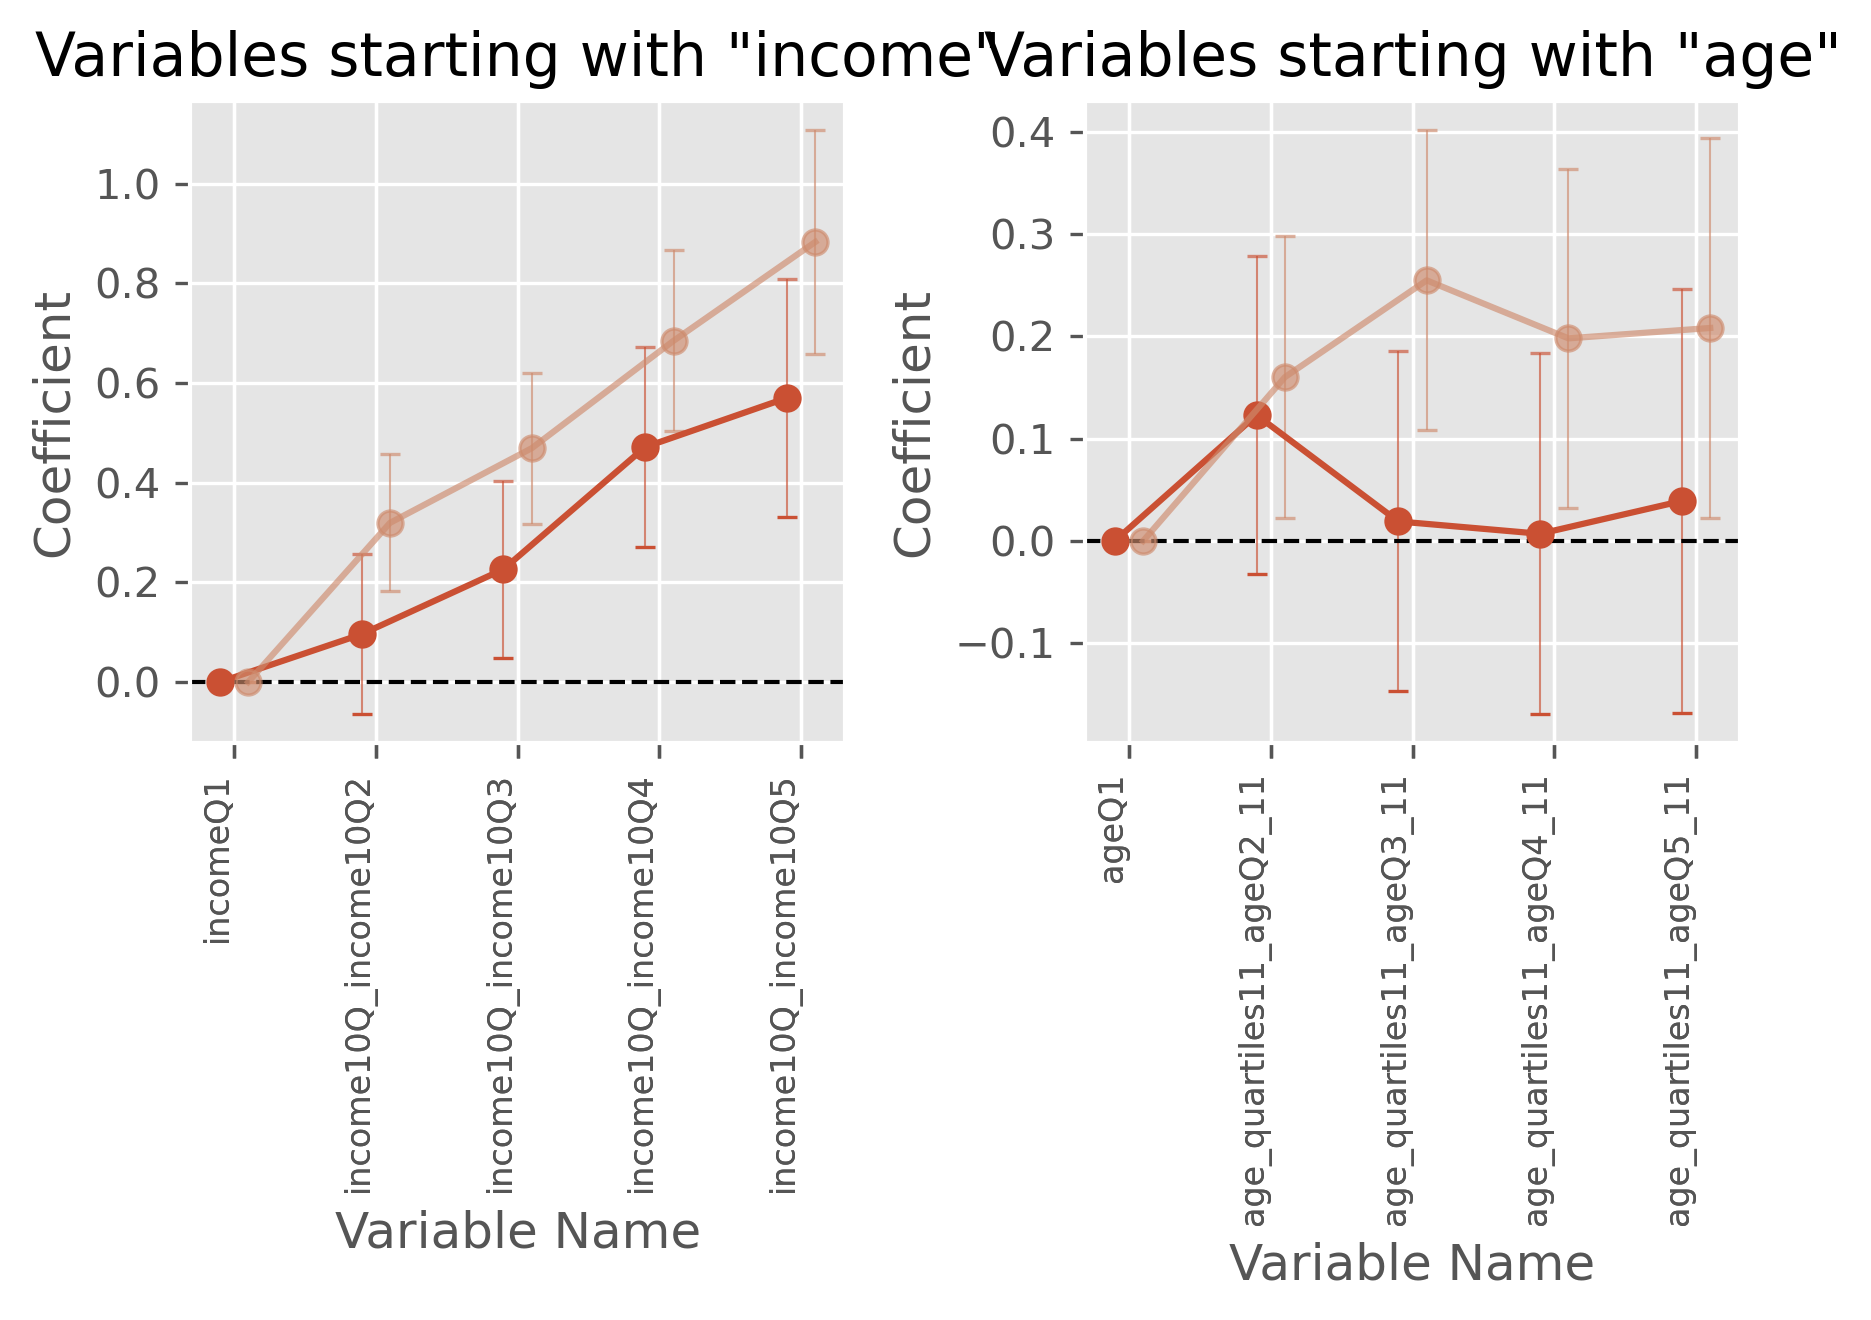

In [369]:
starting_letters = ['income', 'age']

# Create a new plot for all the graphs
fig, axes = plt.subplots(ncols=len(starting_letters), figsize=(3 * len(starting_letters), 4.5), dpi=300)

# Iterate over unique starting letters and create separate graphs
for i, starting_letter in enumerate(starting_letters):
    filtered_df = result_df[result_df['varname'].str.startswith(starting_letter)]
    
    ax = axes[i] if len(starting_letters) > 1 else axes
    
    # Plot the data for each year with lines connecting the dots
    for year in filtered_df['year'].unique():
        year_data = filtered_df[filtered_df['year'] == year]
        
        if year == 2021:
            x_offset = -0.1  # Slight shift to the left for 2021 data
            point_color = '#ca5033'  # Color for the year 2021 data
        else:
            x_offset = 0.1   # Default shift to the right for other years
            point_color = '#ce8b6d'  # Color for other years
        
        ax.errorbar(year_data.index + x_offset, year_data['coef'], yerr=year_data['err'],
                    elinewidth=0.5, markeredgewidth=0.8,
                    fmt='-o', capsize=2.5, label=f'Coefficient - {year}', alpha=0.65, color=point_color)
    
    ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
    ax.set_xticks(filtered_df.index)
    ax.set_xticklabels(filtered_df['varname'], fontsize=8, rotation=90, ha='right')  # Restore x-axis labels
    ax.set_ylabel('Coefficient', fontsize=12)  # Restore y-axis label
    ax.set_xlabel('Variable Name', fontsize=12)  # Restore x-axis label
    ax.set_title(f'Variables starting with "{starting_letter}"')

    # Set alpha back to 1 for the clear dots
    ax.lines[::2][0].set_alpha(1)  # Clear dots
    ax.lines[1::2][0].set_alpha(1)  # Connected dots

plt.tight_layout()

# Save the combined figure
# fig.savefig("viz/edit/tube_income.png", dpi=300)


# Appendix: Check spatial autocorrelation


In [766]:
data.columns

Index(['LSOA11CD', 'geometry', 'total_access_index10', 'bus10', 'underground10', 'rail10', 'white_rate11', 'mixed_rate11', 'asian_rate11', 'black_rate11', 'other_rate11', 'income_quartiles10_incomeQ1_2010', 'income_quartiles10_incomeQ2_2010', 'income_quartiles10_incomeQ3_2010', 'income_quartiles10_incomeQ4_2010', 'average_age_11', 'PopdensePerKm11', 'car_percentage11', 'total_access_index23', 'underground23', 'bus23', 'rail23', 'tram23', 'white_rate21', 'mixed_rate21', 'asian_rate21', 'black_rate21', 'other_rate21', 'income_quartiles19_incomeQ1_2019', 'income_quartiles19_incomeQ2_2019', 'income_quartiles19_incomeQ3_2019', 'income_quartiles19_incomeQ4_2019', 'average_age_21', 'PopdensePerKm21', 'car_percentage21', 'AI_total_change', 'AI_bus_change', 'AI_rail_change', 'AI_underground_change', 'AI_tram_change', 'OA_0', 'OA_1', 'location_inner', 'location_outer'], dtype='object')

In [767]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [768]:
auto_cor = data[['LSOA11CD', 'total_access_index10','geometry']]

In [769]:
auto_cor["resid"] = m0.u

In [770]:
auto_cor["resid"] = weights.lag_spatial(w, auto_cor['resid'])

In [771]:
auto_cor["resid_std"] = auto_cor["resid"] - auto_cor["resid"].mean()
auto_cor["w_resid_std"] = weights.lag_spatial(w, auto_cor['resid_std'])

In [772]:
auto_cor.head(2)

LSOA11CD                     total_access_index10                                           geometry                                    resid                                resid_std                              w_resid_std
0  E01000001                                  50.9638  POLYGON ((532105.092 182011.230, 532162.491 18...                                  11.5348                                  11.4550                                   7.9651
1  E01000002                                  55.5735  POLYGON ((532746.813 181786.891, 532671.688 18...                                  10.2098                                  10.1300                                   6.3481

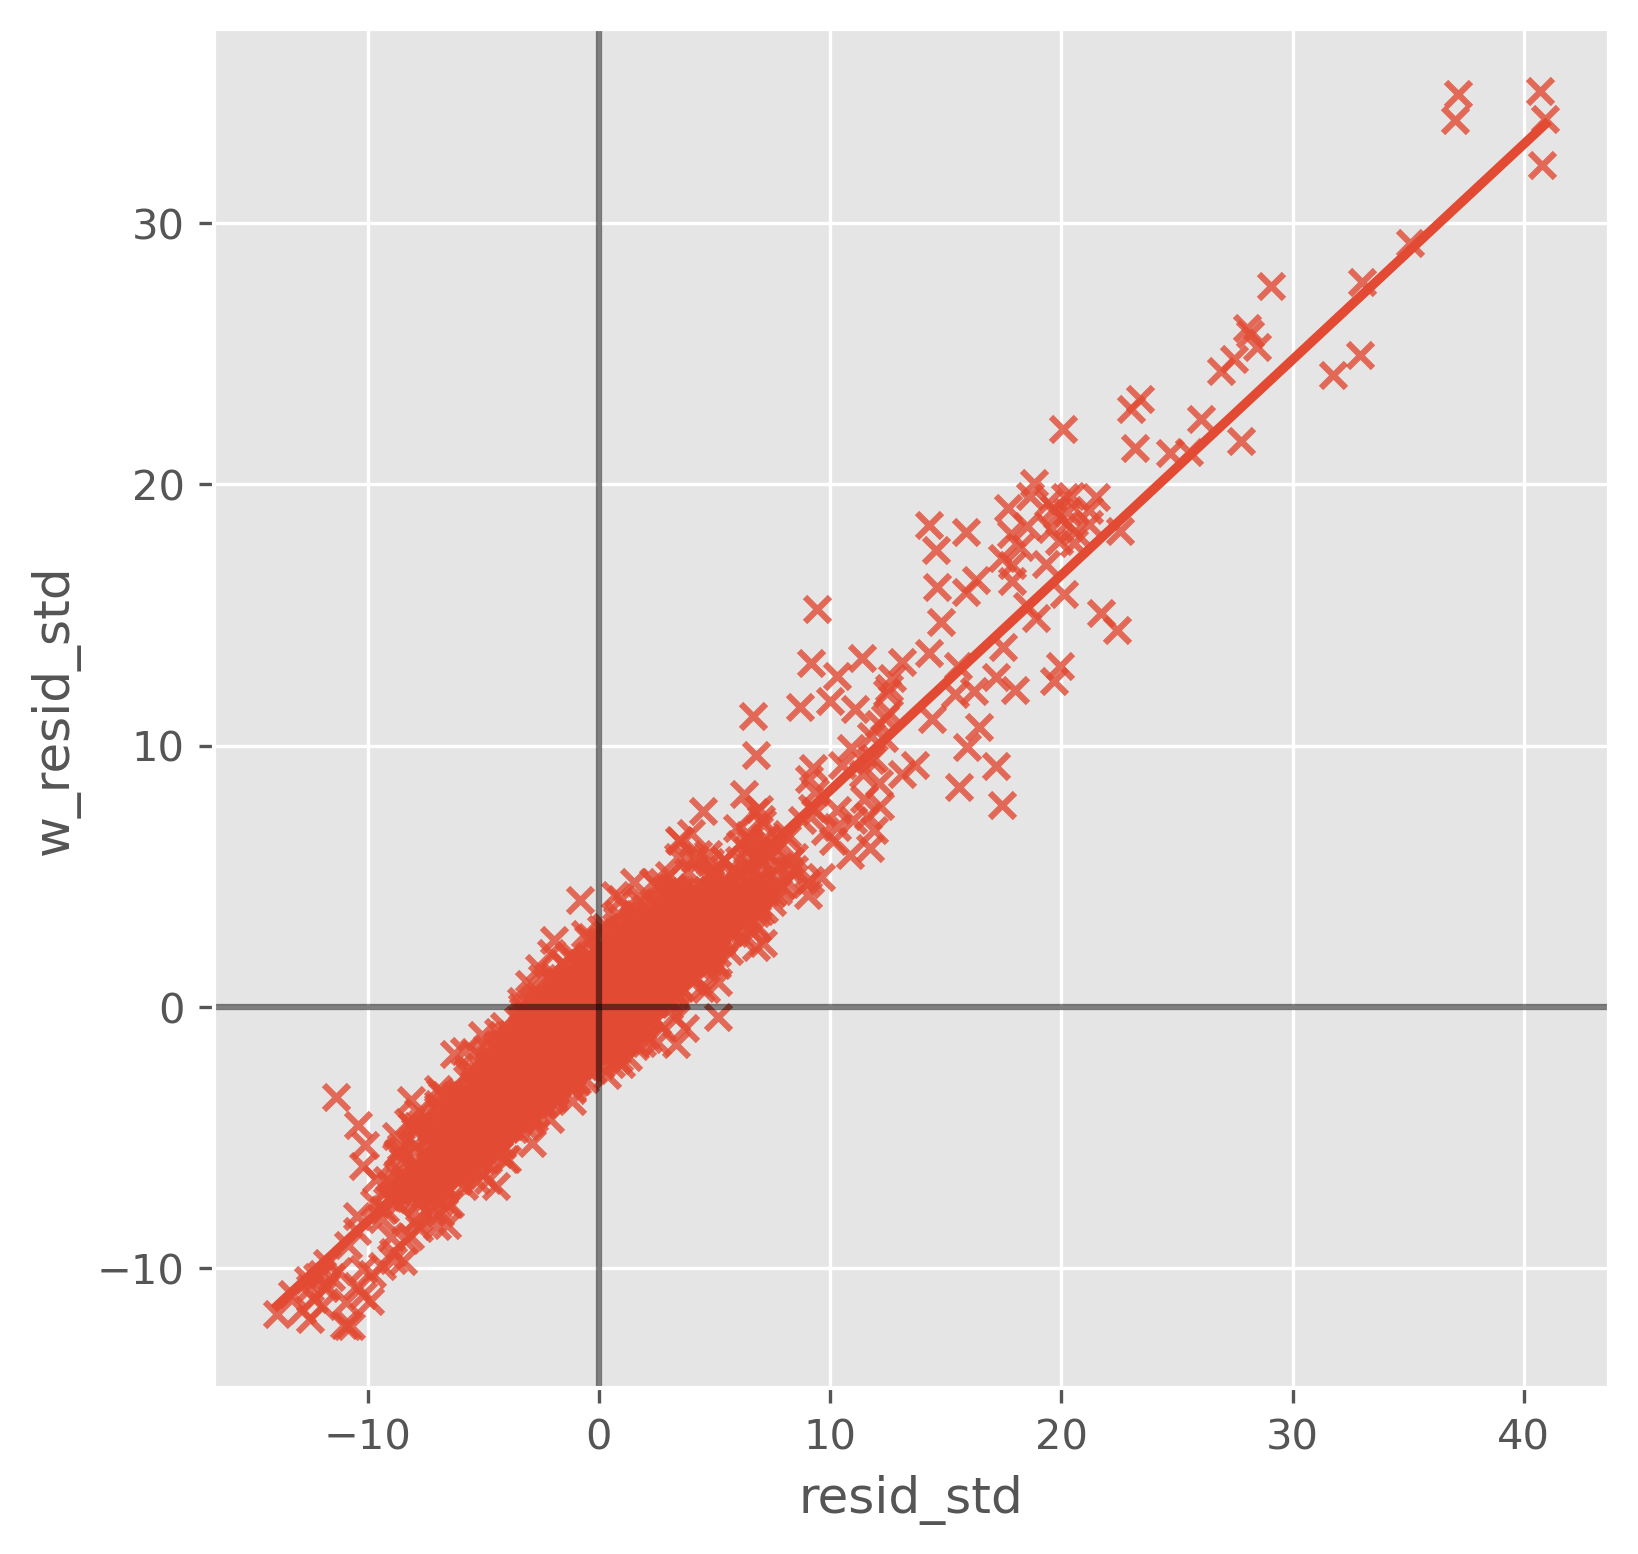

In [804]:
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6),dpi =300)
# Plot values
sns.regplot(x="resid_std", y="w_resid_std", data=auto_cor, ci=None,marker='x')
# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)
# # Add text labels for each quadrant
# plt.text(600, 800, "HH", fontsize=10, c="black")
# plt.text(600, -80, "HL", fontsize=10, c="black")
# plt.text(-80, 600, "LH", fontsize=10, c="black")
# plt.text(-80, -80, "LL", fontsize=10, c="black")
# Display
# plt.savefig("viz/moranI.png")

plt.show()

In [774]:
from splot import esda as esdaplot
from pysal.explore import esda
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

In [775]:
mi = esda.Moran(auto_cor['resid'], w)
print(mi.I)
print(mi.p_sim)

0.8247539751698515
0.001


In [776]:
mi.I

0.8247539751698515

In [777]:
mi.p_sim

0.001

In [778]:
mi.z_norm

118.94207677245197

In [779]:
lisa = esda.moran.Moran_Local(auto_cor["resid"], w)

In [780]:
lisa

In [781]:
auto_cor

LSOA11CD                     total_access_index10                                           geometry                                    resid                                resid_std                              w_resid_std
0     E01000001                                  50.9638  POLYGON ((532105.092 182011.230, 532162.491 18...                                  11.5348                                  11.4550                                   7.9651
1     E01000002                                  55.5735  POLYGON ((532746.813 181786.891, 532671.688 18...                                  10.2098                                  10.1300                                   6.3481
2     E01000003                                  28.3517  POLYGON ((532135.145 182198.119, 532158.250 18...                                   9.1021                                   9.0224                                   4.2891
3     E01000005                                  62.1861  POLYGON ((533807.946 180767.770, 533649.063 18...                                   4.0653                                   3.9855                                   1.6525
4     E01000006                                  22.0700  POLYGON ((545122.049 184314.931, 545271.917 18...                                   7.1067                                   7.0269                                   4.4126
...         ...                                      ...                                                ...                                      ...                                      ...                                      ...
4830  E01033742                                   3.5175  POLYGON ((544642.680 179824.674, 544766.313 17...                                   1.3716                                   1.2918                                   2.2170
4831  E01033743                                   3.4251  POLYGON ((546579.195 181097.813, 546687.036 18...                                  -0.1986                                  -0.2784                                  -0.2103
4832  E01033744                                   8.6087  POLYGON ((544536.486 179447.115, 544602.630 17...                                   3.1134                                   3.0336                                   2.7845
4833  E01033745                                   4.4576  POLYGON ((546415.745 180152.270, 546320.715 18...                                  -1.4912                                  -1.5710                                  -0.3919
4834  E01033746                                  14.5564  POLYGON ((538140.000 177313.000, 538129.177 17...                                  -1.9902                                  -2.0700                                  -1.5315

[4835 rows x 6 columns]

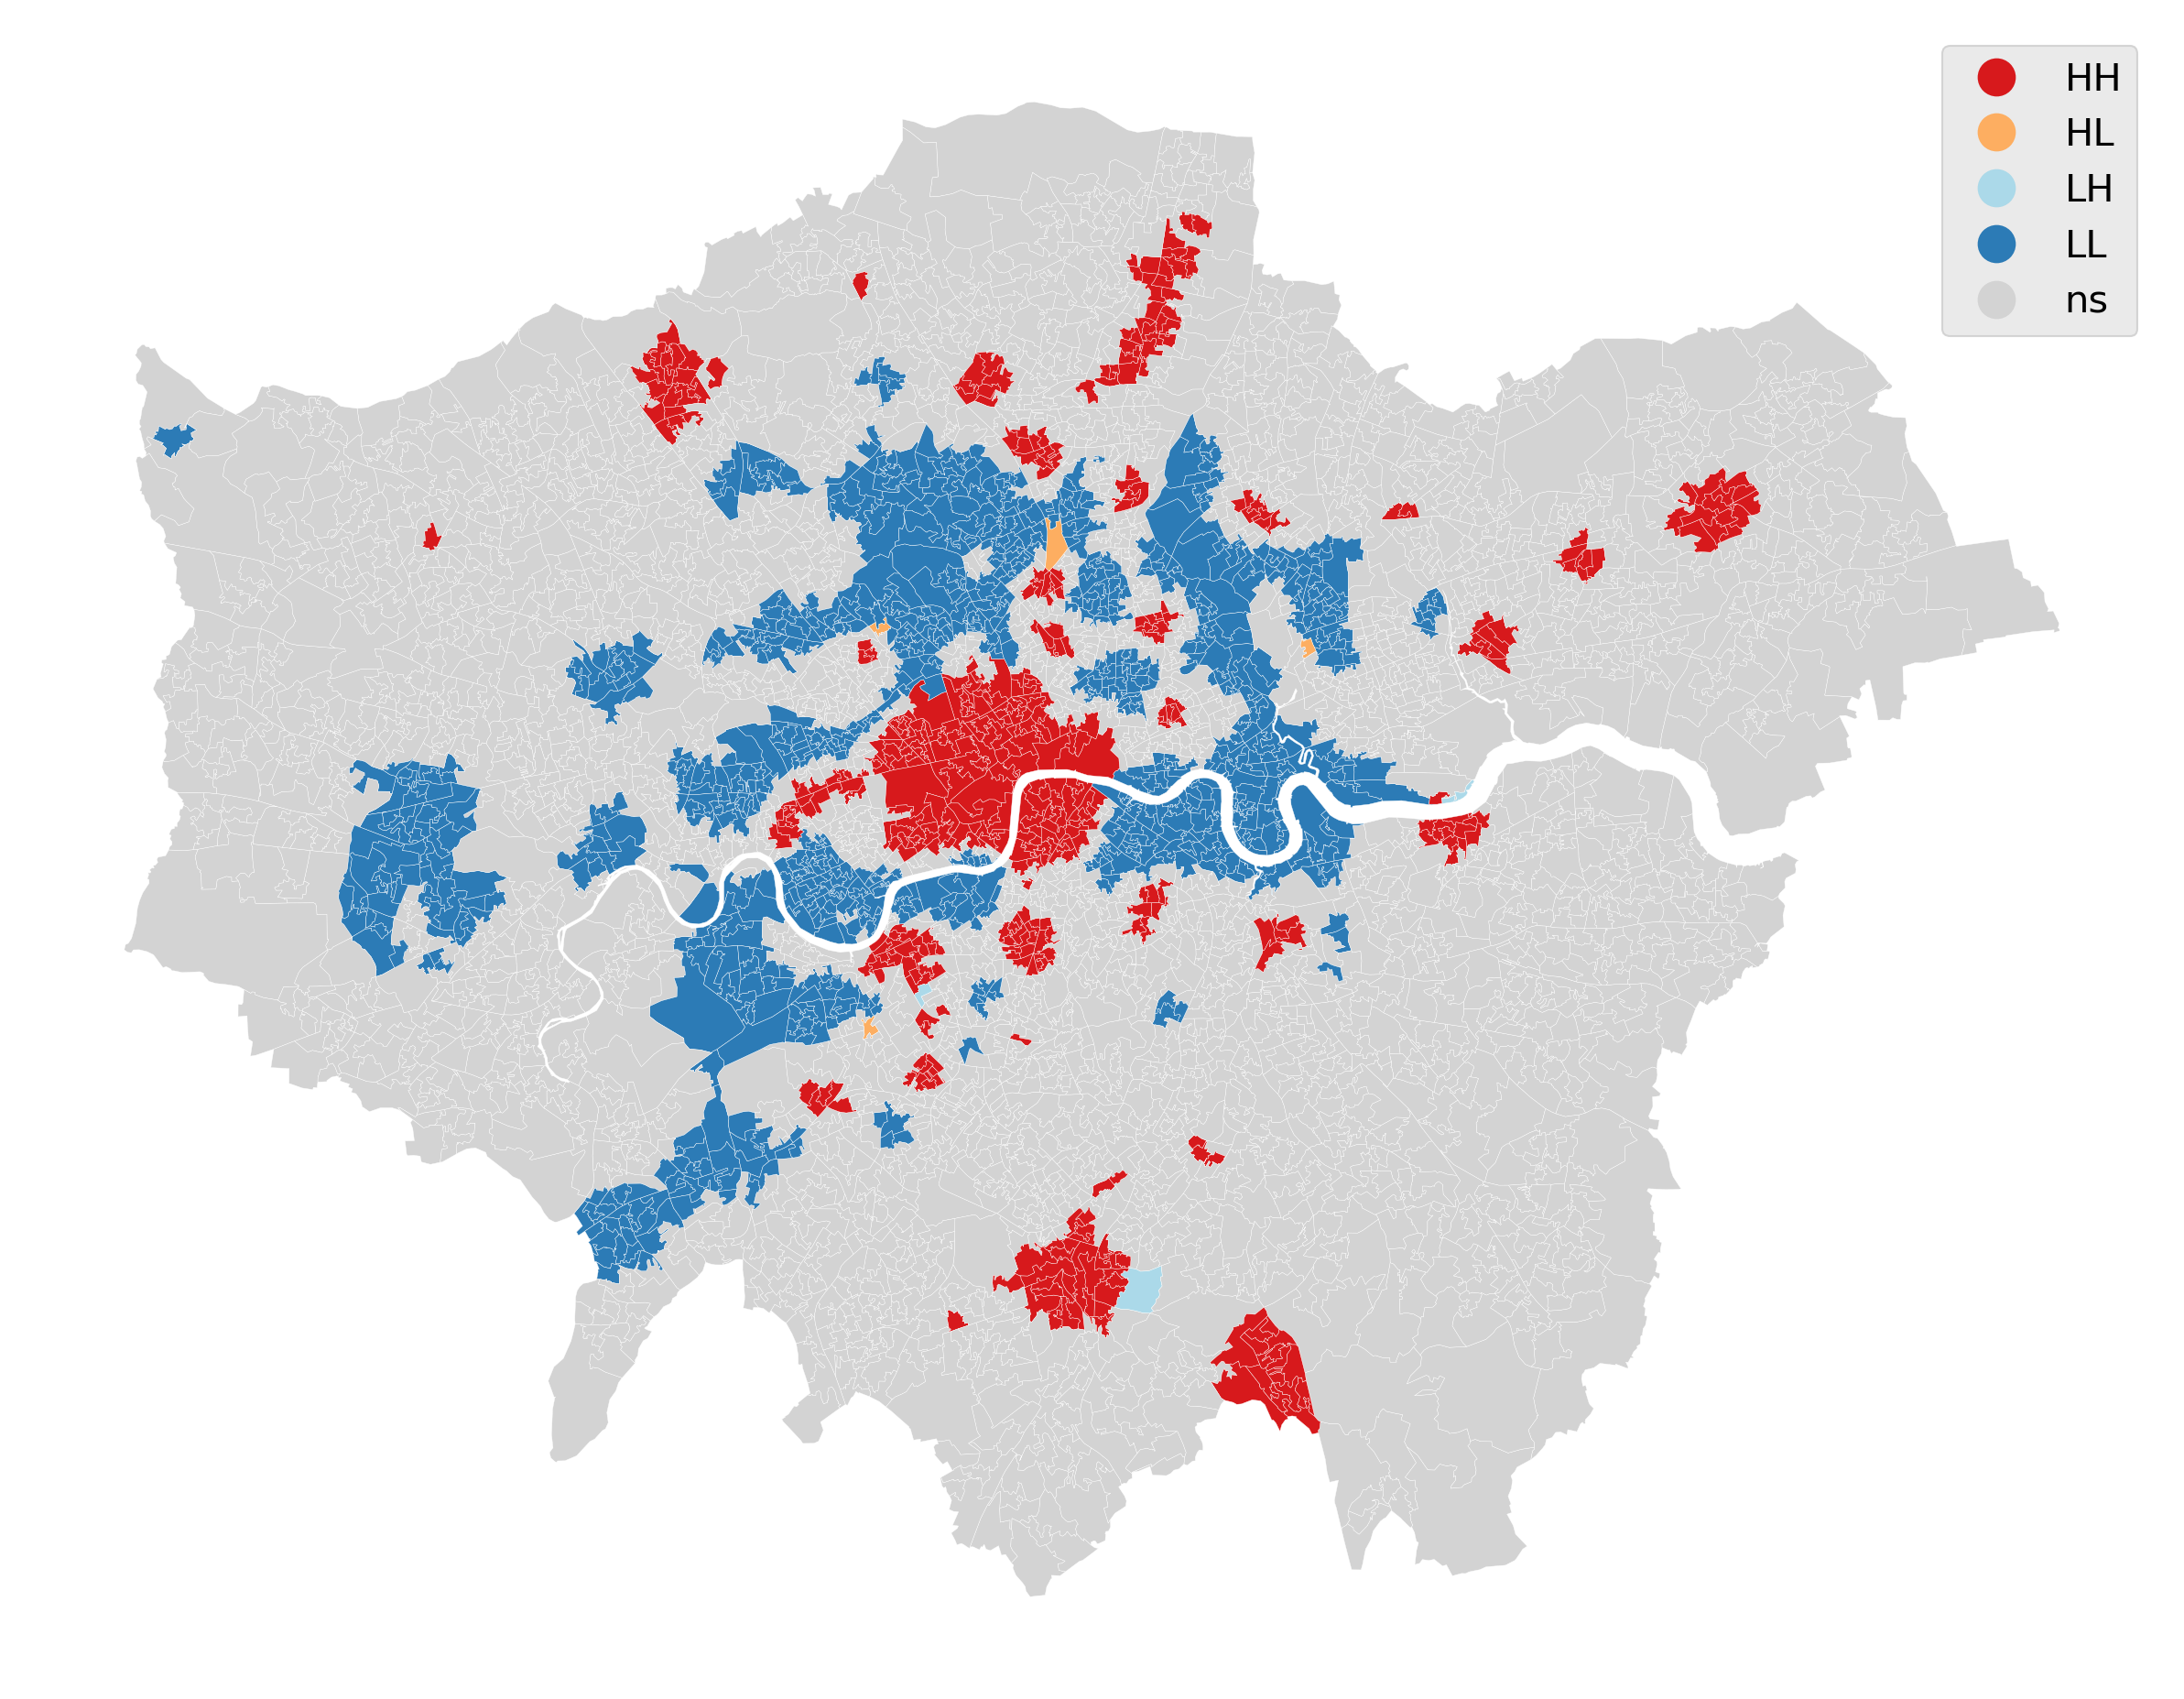

In [803]:
f, axs = plt.subplots(figsize=(10,10),dpi = 300)
ax = esdaplot.lisa_cluster(lisa, auto_cor, p=0.05,ax =axs)

plt.savefig("viz/lisa.png")
plt.show()